# The seaborn.objects interface 

- `seaborn.objects` 는 0.12 버전에서 소개되었으며 seaborn 그래프를 만드는 완전히 새로운 인터페이스입니다.
- 더 일관되고 유연한 API를 제공합니다.
- 기존에 존재하는 `seaborn` 함수와 대비되게 새로운 인터페이스는 matplotlib까지 가지않는 처음부터 끝까지 커스텀할 수 있는데 초점을 두었습니다.

❗️주의사항❗️ <br>
`seaborn.object`는 현재 완성되지 않고 실험적입니다.

## Specifying a plot and mapping data 

In [2]:
# seaborn 버전 업그레이드
# !pip install seaborn --upgrade

In [3]:
# 버전 확인
import seaborn as sns
sns.__version__

'0.12.2'

In [4]:
import seaborn.objects as so

In [5]:
penguins = sns.load_dataset('penguins')

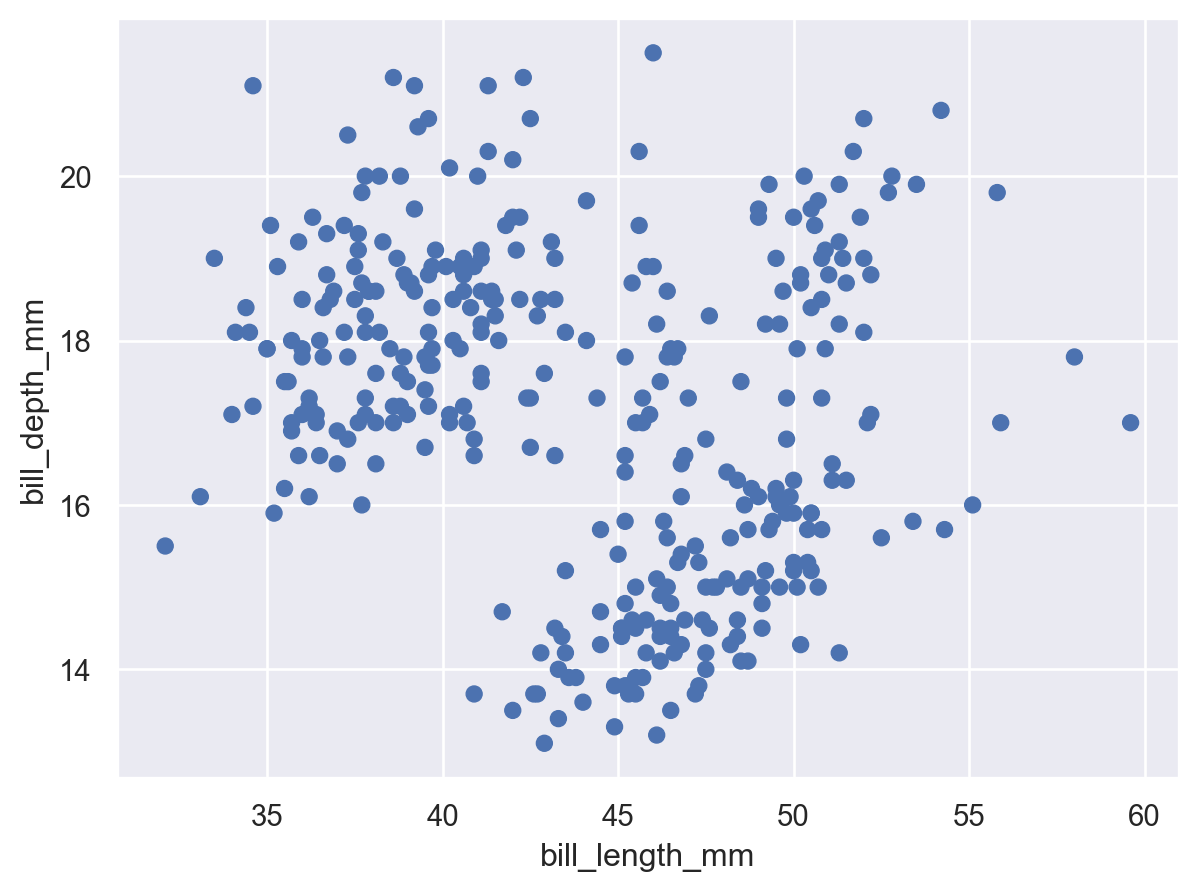

In [6]:
so.Plot(penguins, x='bill_length_mm', y='bill_depth_mm').add(so.Dot())

- 이 코드는 scatter plot을 생성합니다. 
- `seaborn.scatterplot()`을 사용할 때처럼 penguin 데이터프레임을 불러와 x와 y에 할당합니다. 
- 어떤 차트를 쓸 지 그러고 어떤 데이터를 지정할지 고르는 대신에 우선적으로 데이터를 지정한 후에 그래프 요소를 더합니다.

### Setting properties

- `Dot` 클래스는 `Mark`의 예시입니다. -> 데이터 값을 그래프로 보여주는 객체
- 각 표시는 외관을 변경할 수 있는 몇 가지 특징을 가지고 있습니다. 

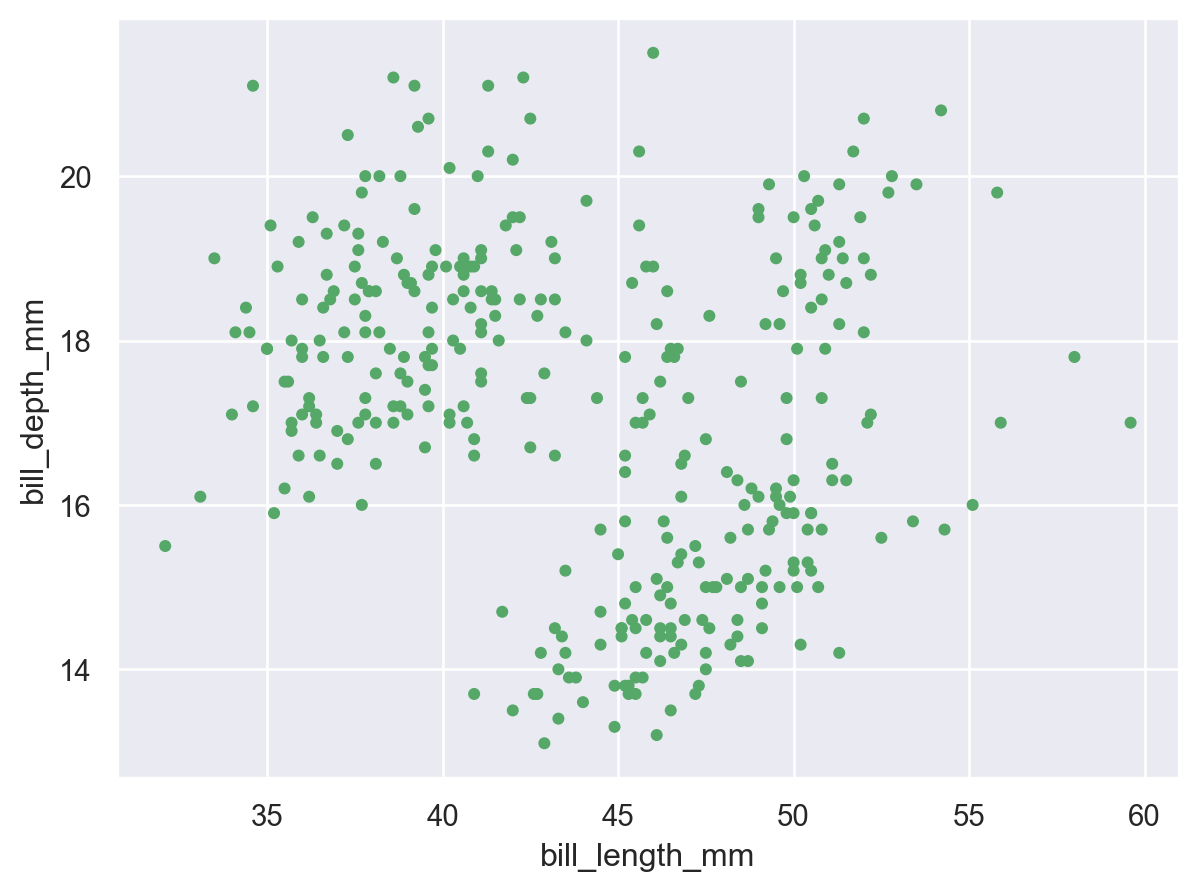

In [7]:
so.Plot(penguins, x='bill_length_mm', y='bill_depth_mm').add(so.Dot(color='g', pointsize=4))

### Mapping properties

- 데이터 값을 다양한 특징으로 나누어서 표현할 수도 있습니다. 

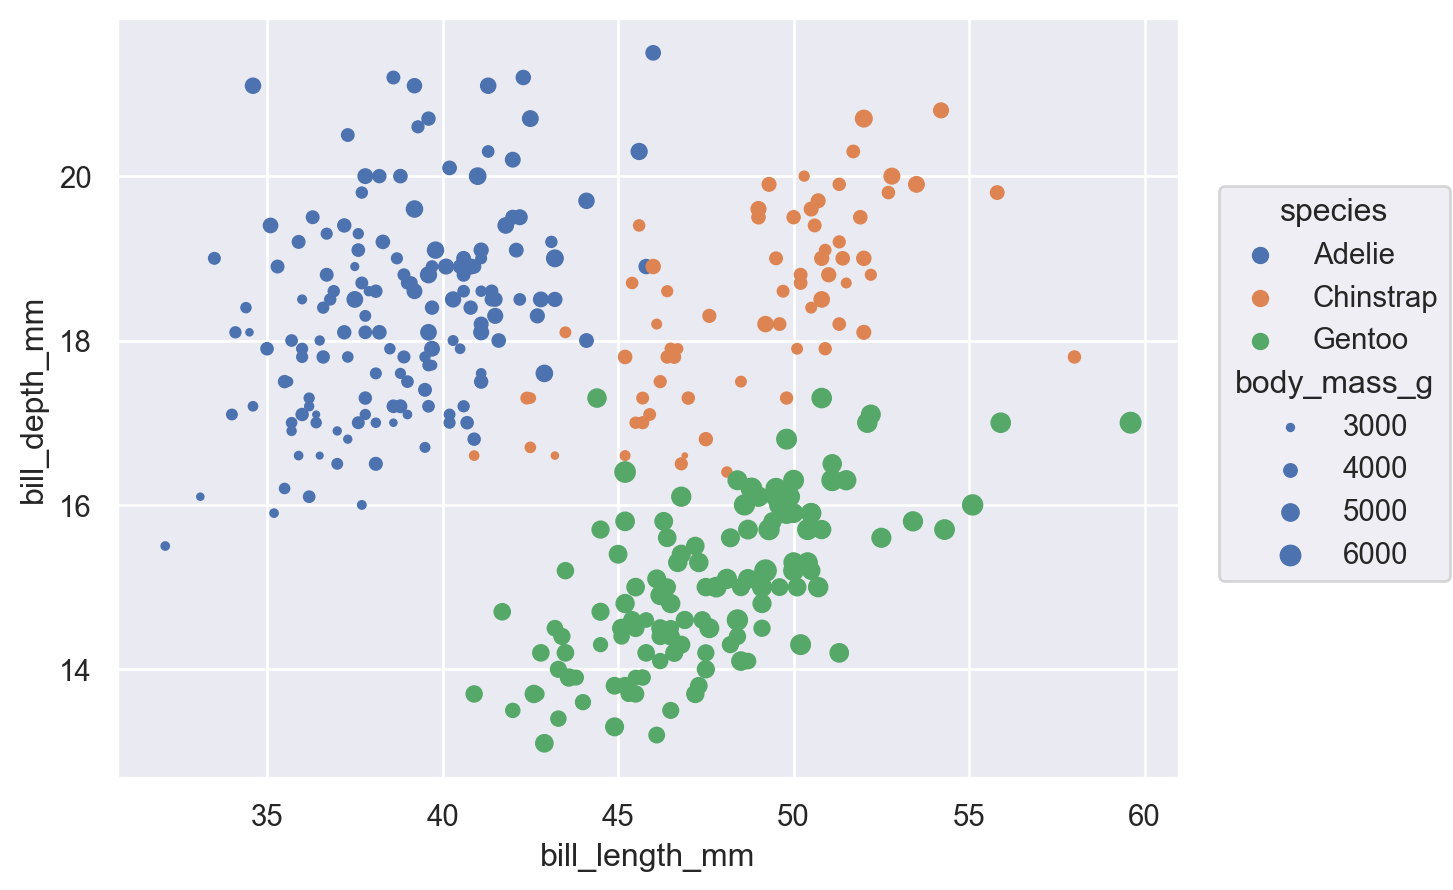

In [8]:
so.Plot(
    penguins, x='bill_length_mm', y='bill_depth_mm',
    color='species', pointsize='body_mass_g').add(so.Dot())

- 기존 API와 차이점은 특징들을 하나로 묶는 파라미터들의 이름이 직관적이라는 것입니다. 
- 그러고 파라미터가 어디에 정의하는지도 다릅니다.
- 이러한 차이점을 넘어 object interface는 더 다양한 범위의 표시 properties를 허락합니다. 

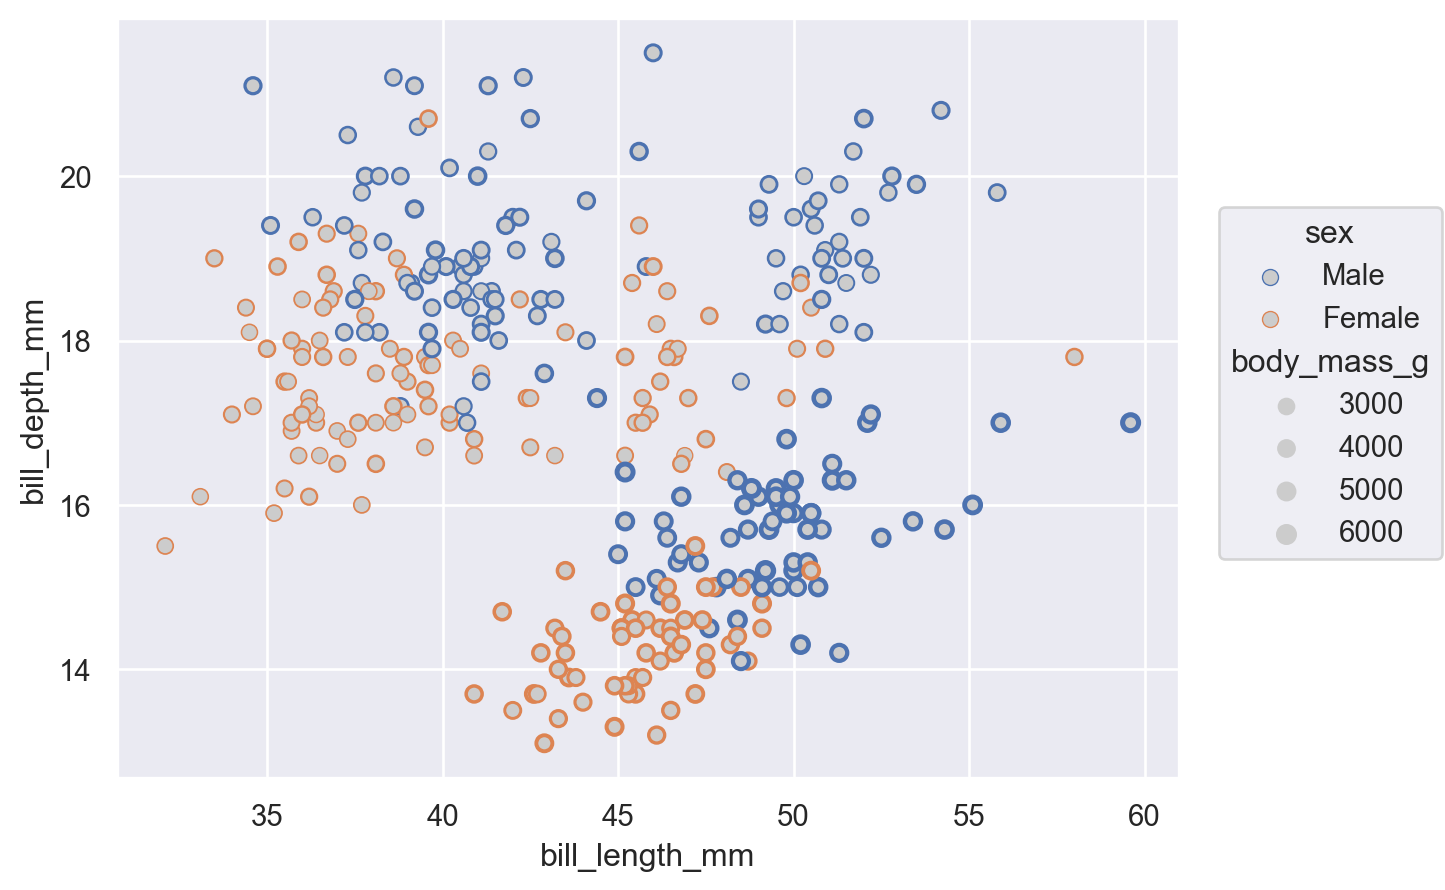

In [9]:
so.Plot(
    penguins, x='bill_length_mm', y='bill_depth_mm',
    edgecolor='sex', edgewidth='body_mass_g').add(so.Dot(color='.8'))

### Defining groups 

- `Dot` 표시는 각 데이터 포인트를 독립적으로 나타냅니다. 
- 데이터를 연속적으로 표현하는 `Line`은 서로 다른 그래픽 요소들을 결정합니다

In [10]:
healthexp = sns.load_dataset('healthexp')

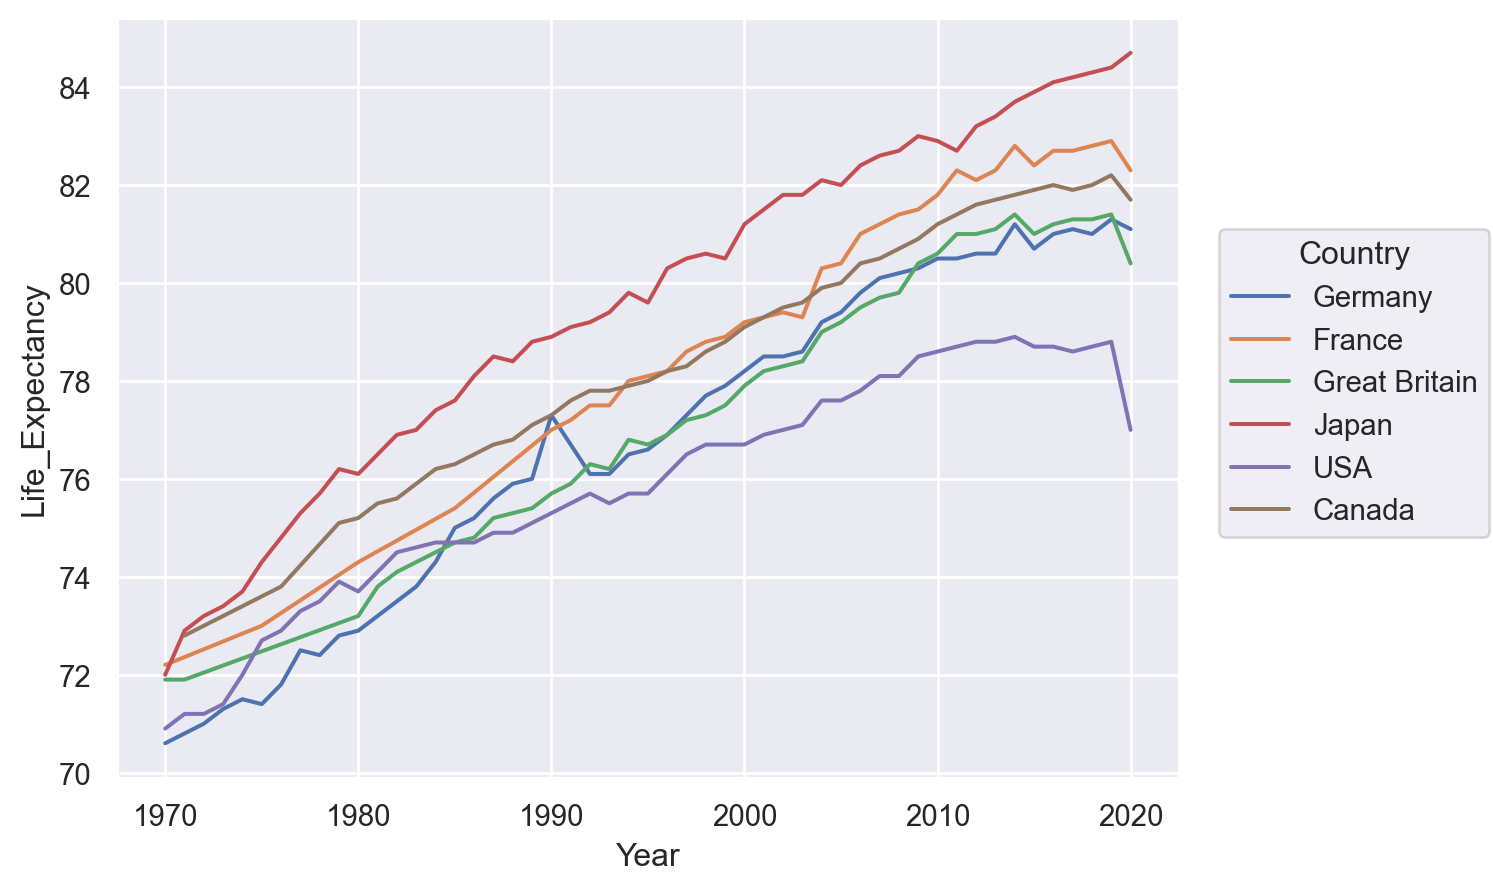

In [11]:
so.Plot(healthexp, x='Year', y='Life_Expectancy', color='Country').add(so.Line())

- 어떠한 비주얼 특성을 변경하지 않고도 나타낼 수 있는데 이때는 `group`을 사용합니다. 

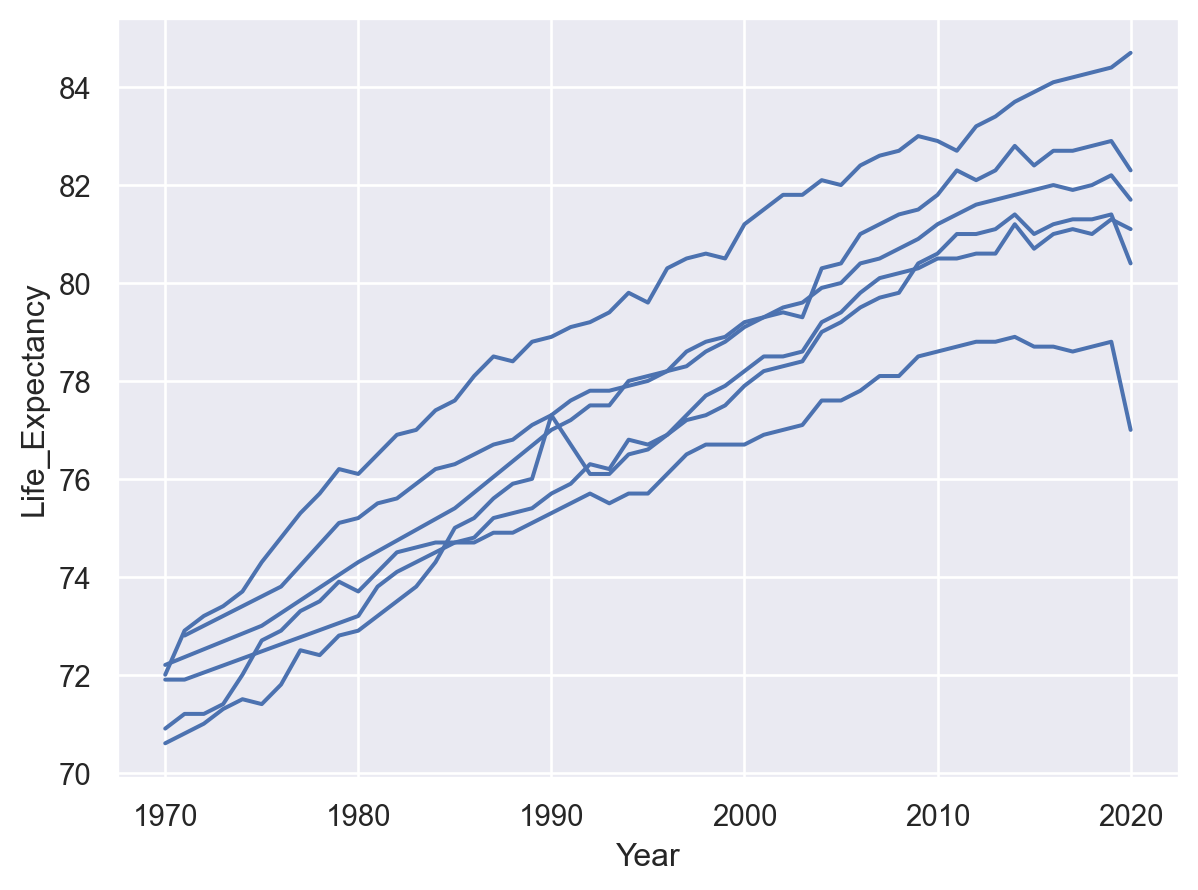

In [12]:
so.Plot(healthexp, x="Year", y="Life_Expectancy", group="Country").add(so.Line())

## Transforming data before plotting

### Statistical transformation

- 많은 seaborn 함수처럼 objects interface는 통계학적 변경점을 지원합니다. 
- `stat` 또는 `Agg`로 실행됩니다. 

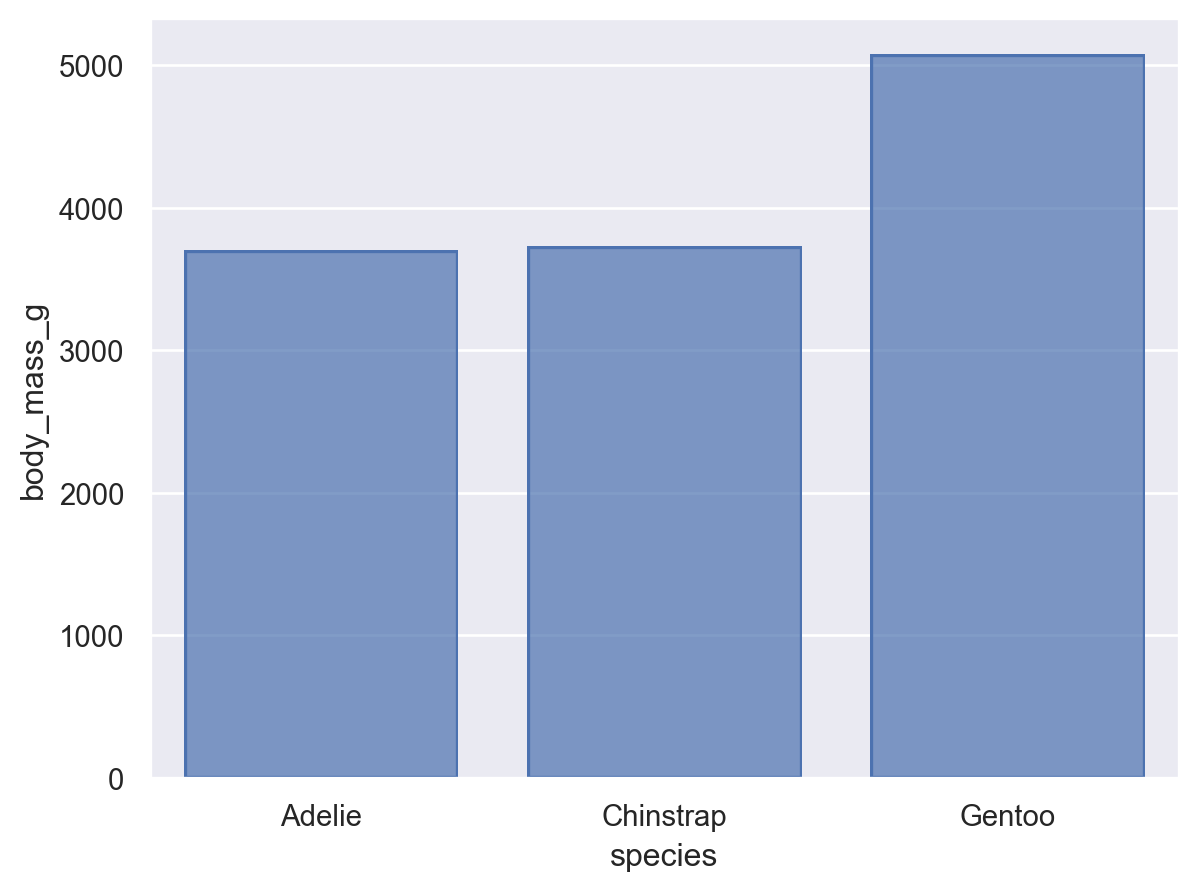

In [13]:
so.Plot(penguins, x='species', y='body_mass_g').add(so.Bar(), so.Agg())

- 통계학적 변형은 몇 몇의 인터페이스에서만 적용됩니다. 
- 예를 들어 `seaborn.barplot()`은 되지만 `seaborn.scatterplot()`은 쓸 수 없습니다. 

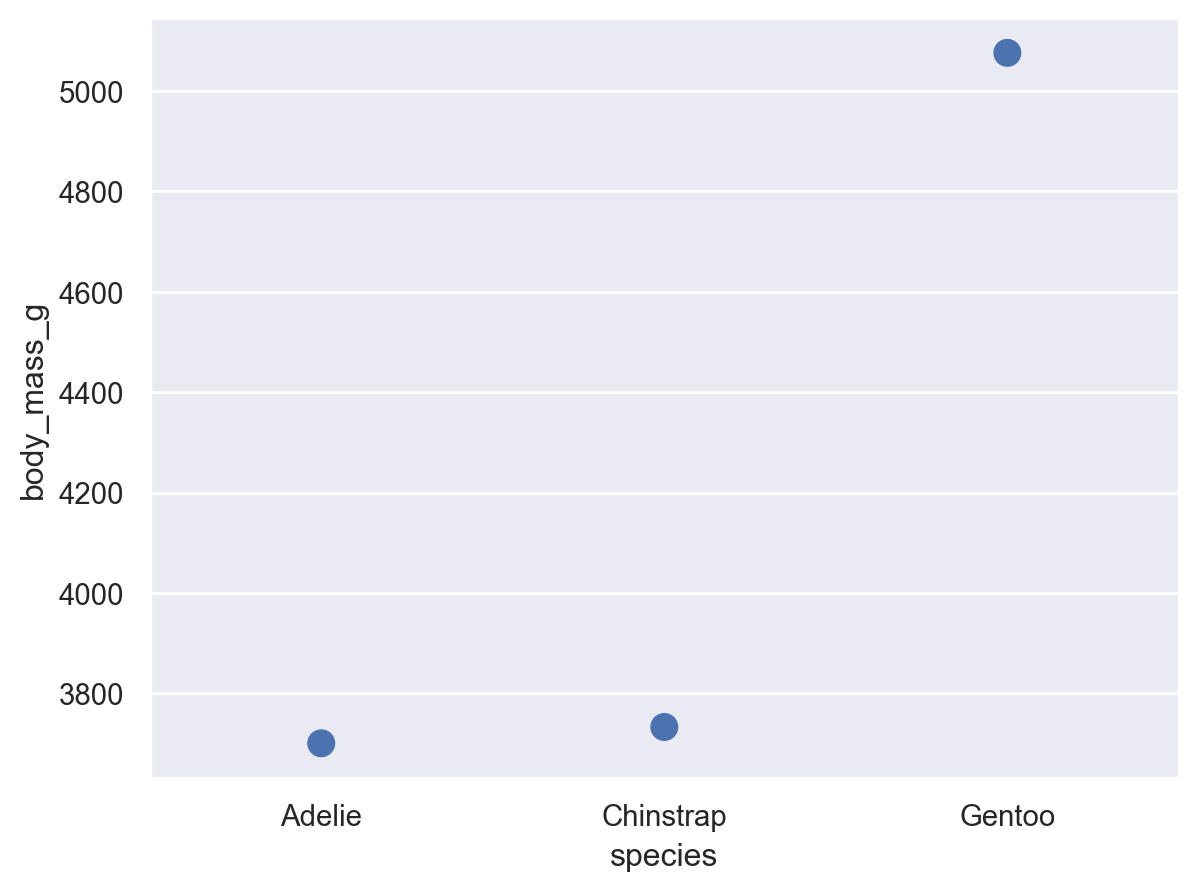

In [14]:
so.Plot(penguins, x='species', y='body_mass_g').add(so.Dot(pointsize=10), so.Agg())

- 만약 데이터를 그룹화 한다면 통계 변형은 각각 그룹에 적용됩니다. 

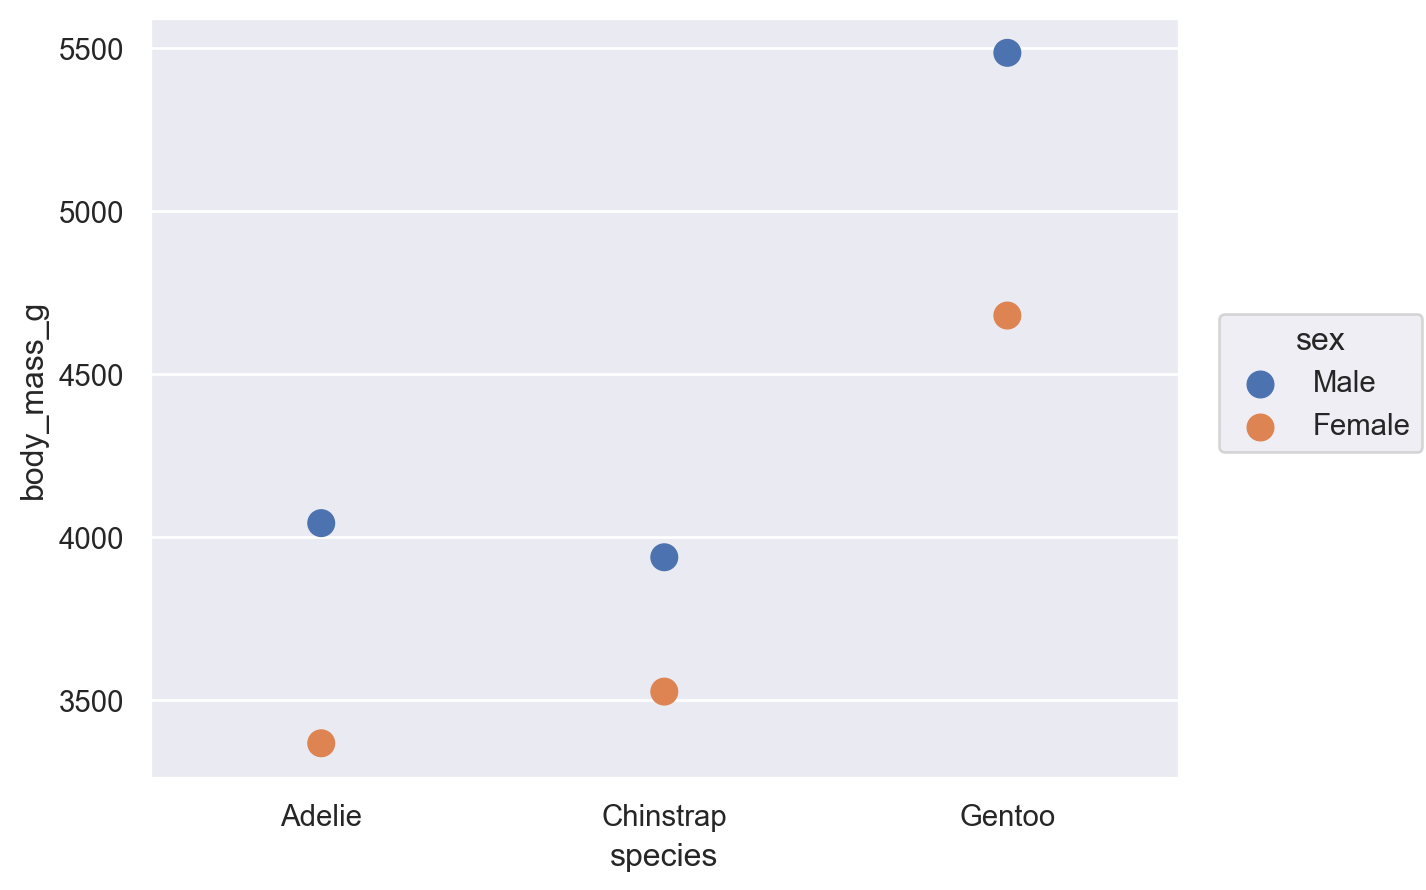

In [15]:
so.Plot(penguins, x='species', y='body_mass_g', color='sex').add(so.Dot(pointsize=10), so.Agg())

### Resolving overplotting

- 어떤 seaborn 함수는 overplotting을 자동적으로 해결해 주는 기능을 가지고 있습니다. 
- `hue`가 지정된다면 `seaborn.barplot()` 옆으로 놓아줍니다. 
- object interface는 덜 복잡합니다. 
- 바그래프는 오버랩이 기본입니다. 

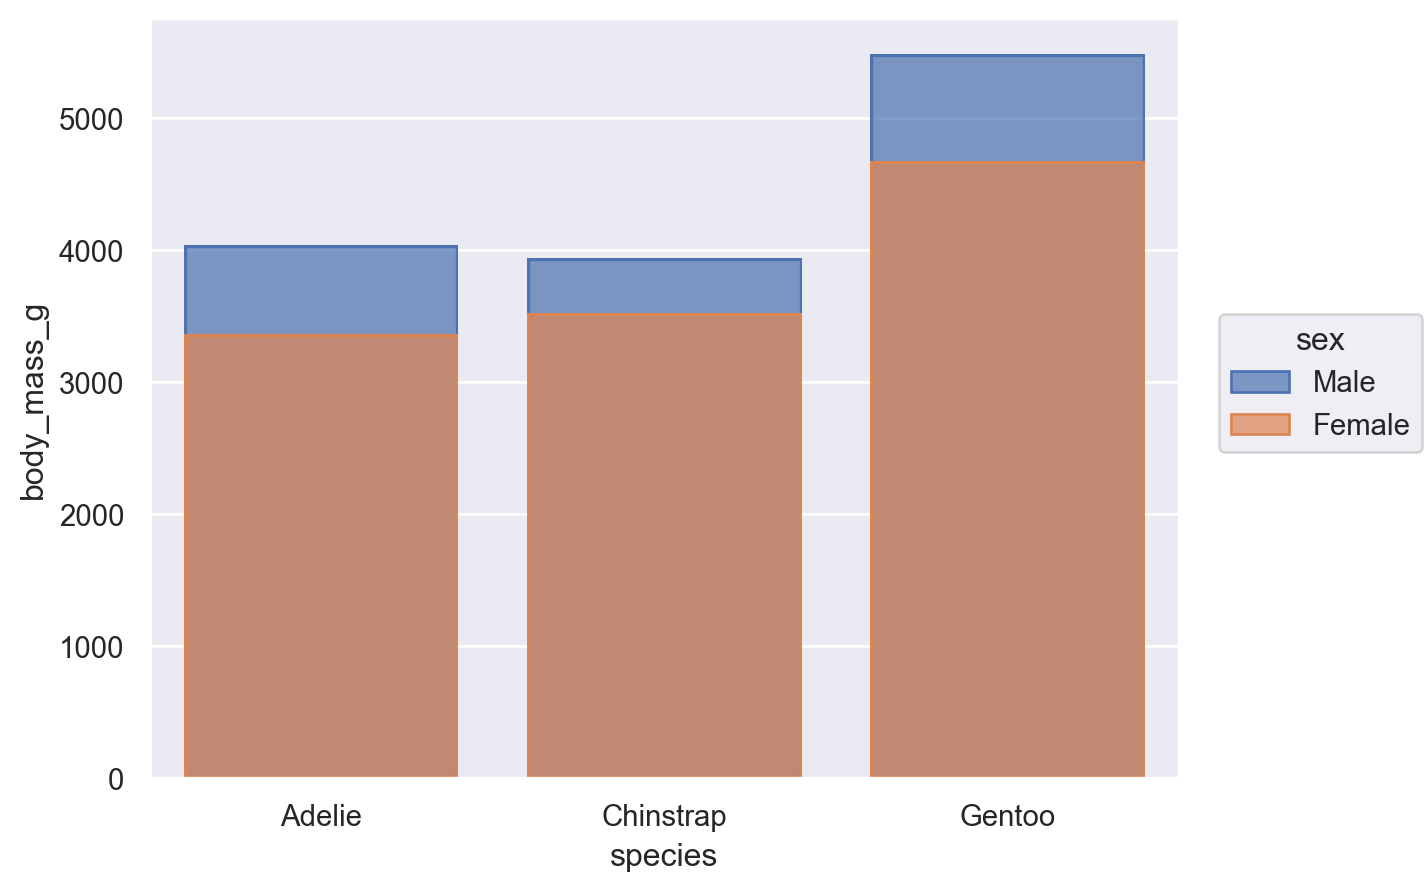

In [16]:
so.Plot(penguins, x='species', y='body_mass_g', color='sex').add(so.Bar(), so.Agg())

- 그럼에도 불구하고 바그래프를 양옆으로 놓는것도 가능합니다

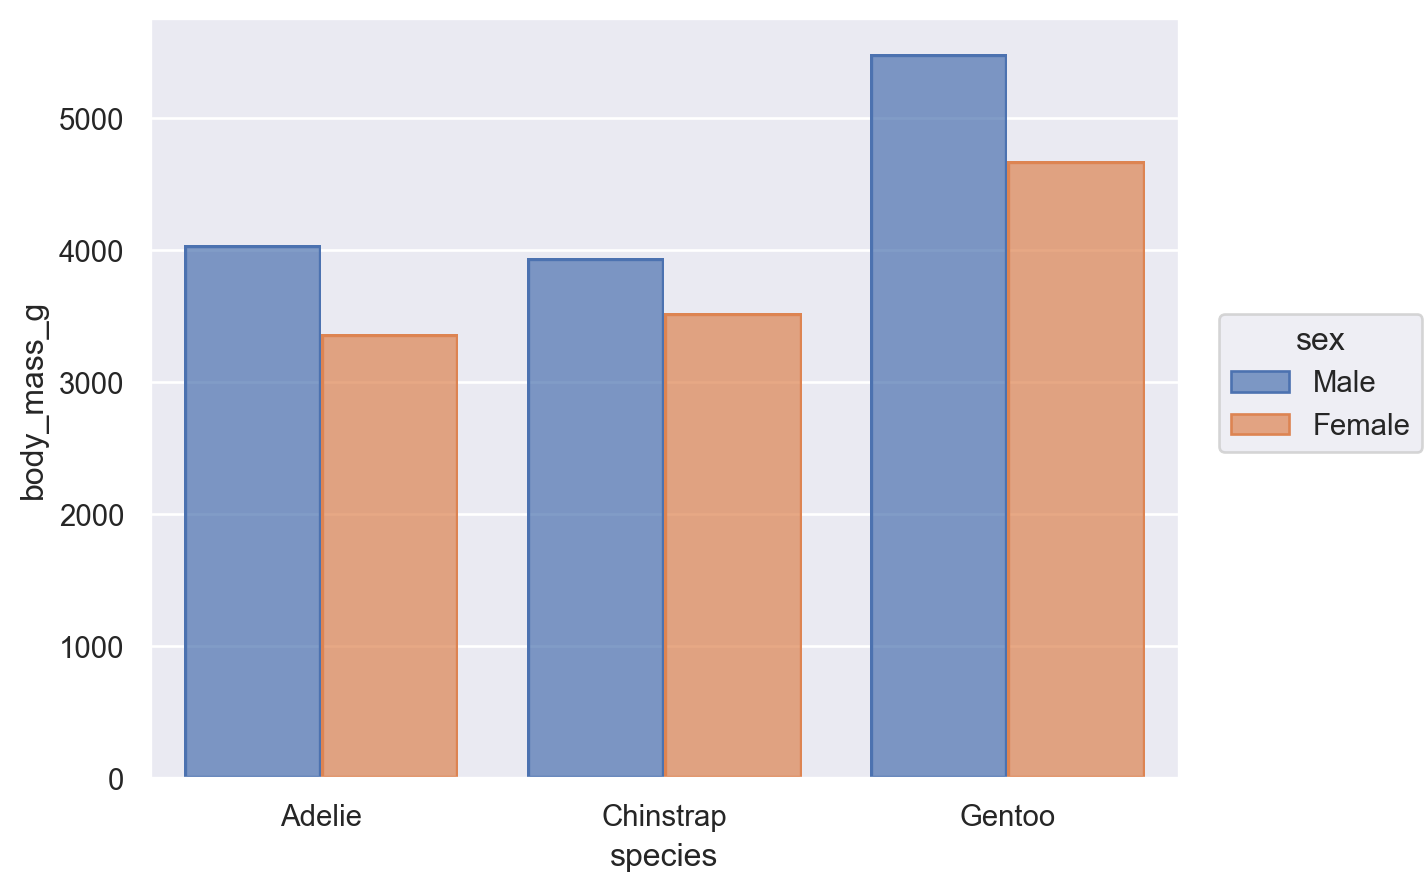

In [17]:
so.Plot(penguins, x='species', y='body_mass_g', color='sex').add(so.Bar(),so.Agg(), so.Dodge())

- `Dodge` 클래스는 `Move` 변형의 예시입니다. 
- `Move` 클래스는 어떠한 표시에 적용될 수 있습니다. 그러나 `Stat`을 먼저 사용할 필요는 없습니다.

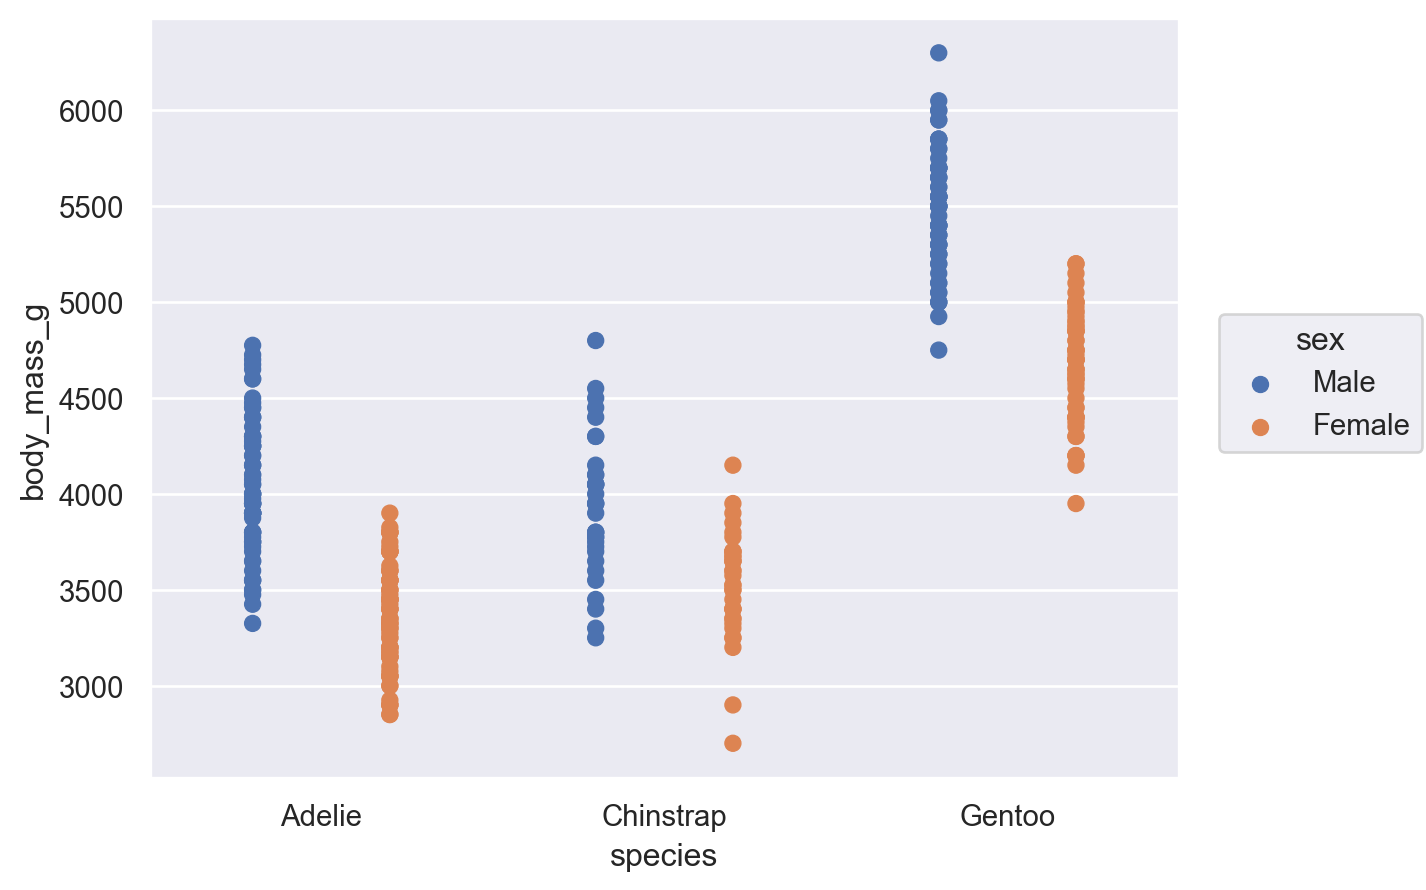

In [18]:
so.Plot(penguins, x='species', y='body_mass_g', color='sex').add(so.Dot(), so.Dodge())

- 다수의 `Move` 작업도 가능합니다.

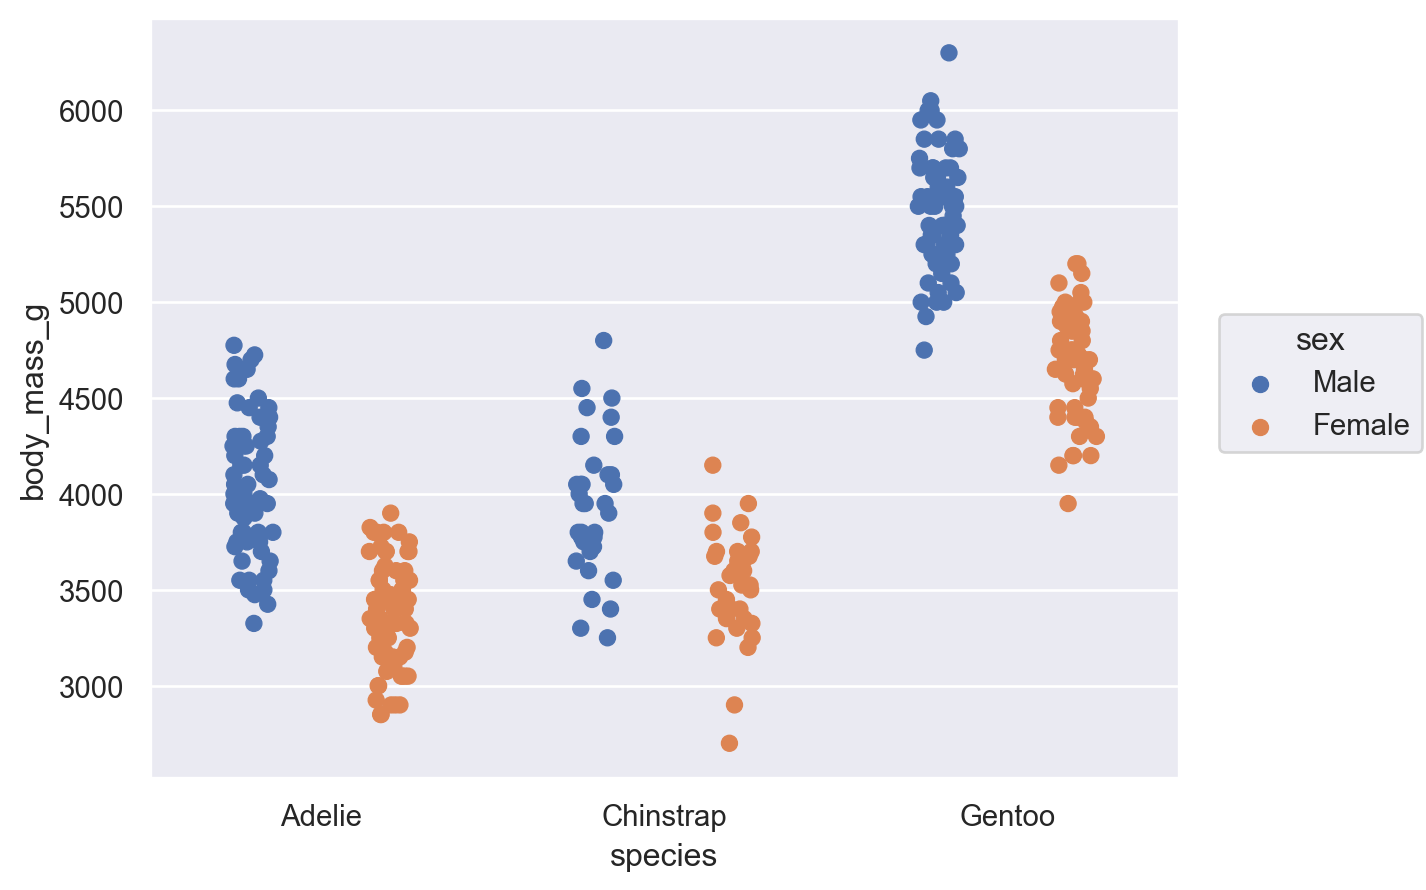

In [19]:
so.Plot(penguins, x='species', y='body_mass_g', color='sex').add(so.Dot(), so.Dodge(), so.Jitter(.3))

### Creating variablesd through transformation

- `Agg`의 경우 x와 y값을 정의해야 하지만 변수들은 통계 변형으로 생성될 수 있습니다. 
- 예를 들어 `Hist`는 x나 y가 정의되어야 합니다. 

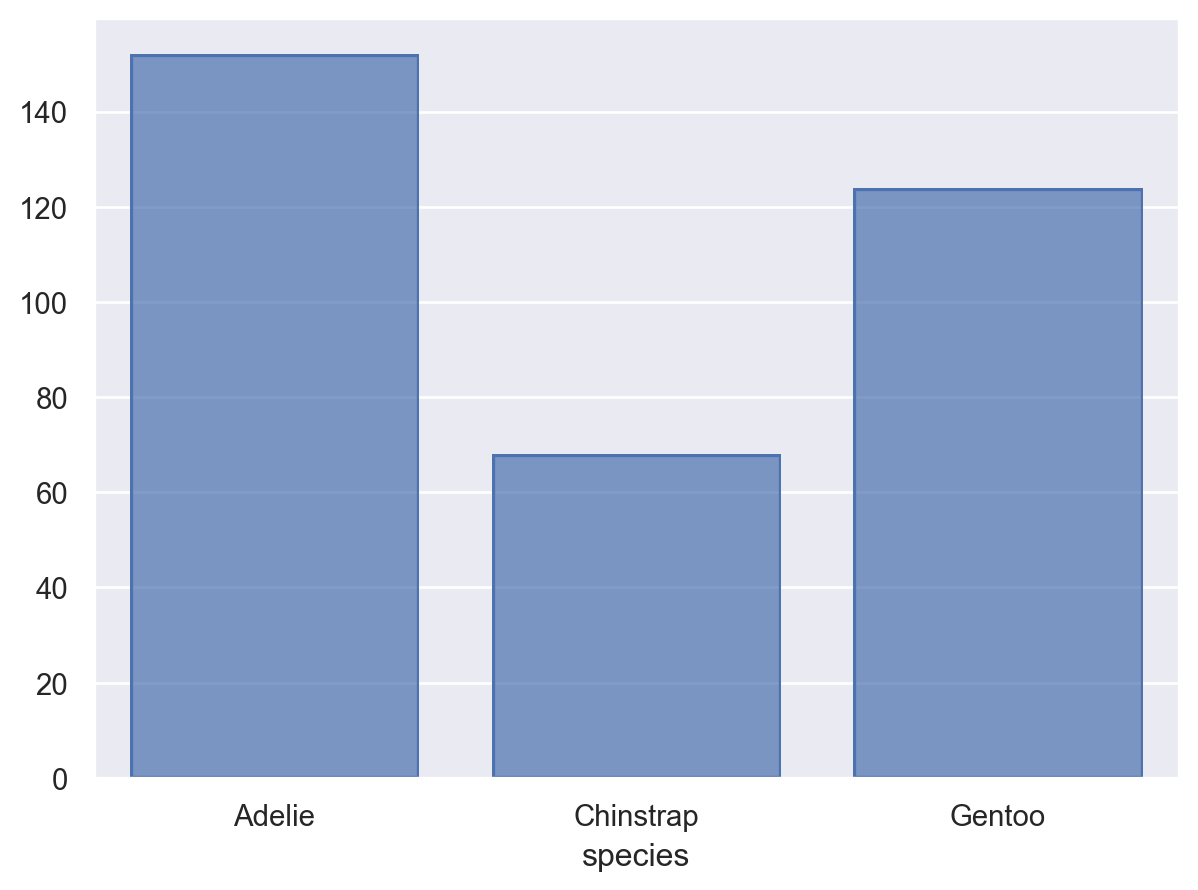

In [20]:
so.Plot(penguins, x='species').add(so.Bar(), so.Hist())

- `Hist` 는 수치형 데이터일 경우 bins를 생성해줍니다. 

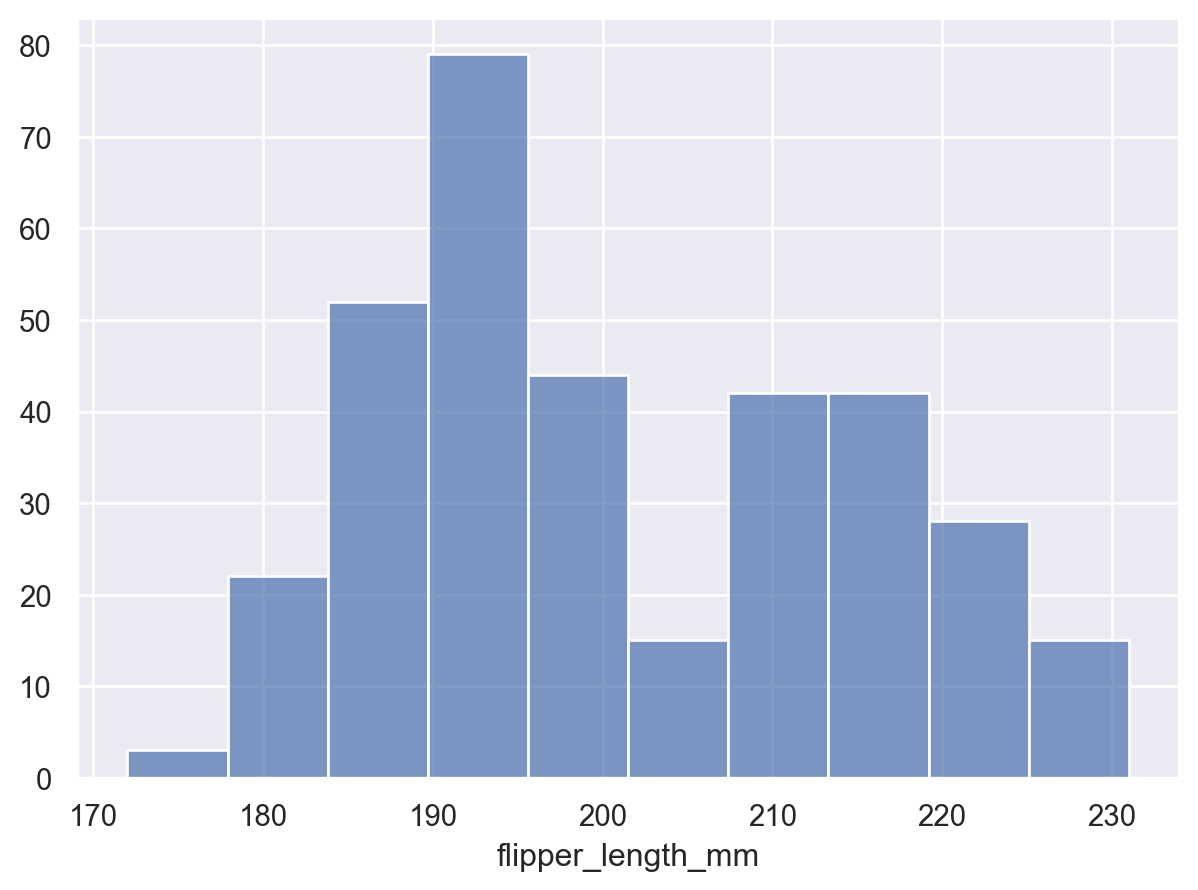

In [21]:
# bar 과 bars의 차이점은 bars를 쓴 경우 수치형 변수 사이에 spacing이 없다. 
so.Plot(penguins, x='flipper_length_mm').add(so.Bars(), so.Hist())

- 연속형 x축에서는 `Bar` 보다는 `Bars`를 사용했습니다. 
- `Bars`는 연속형 데이터에 사용하기에 적합합니다. 

- 어떤 변형은 x와 y 모두 받아들입니다. 하지만 각 좌표에 인터벌을 더합니다. 
- 신뢰구간도 생성할 수 있습니다.

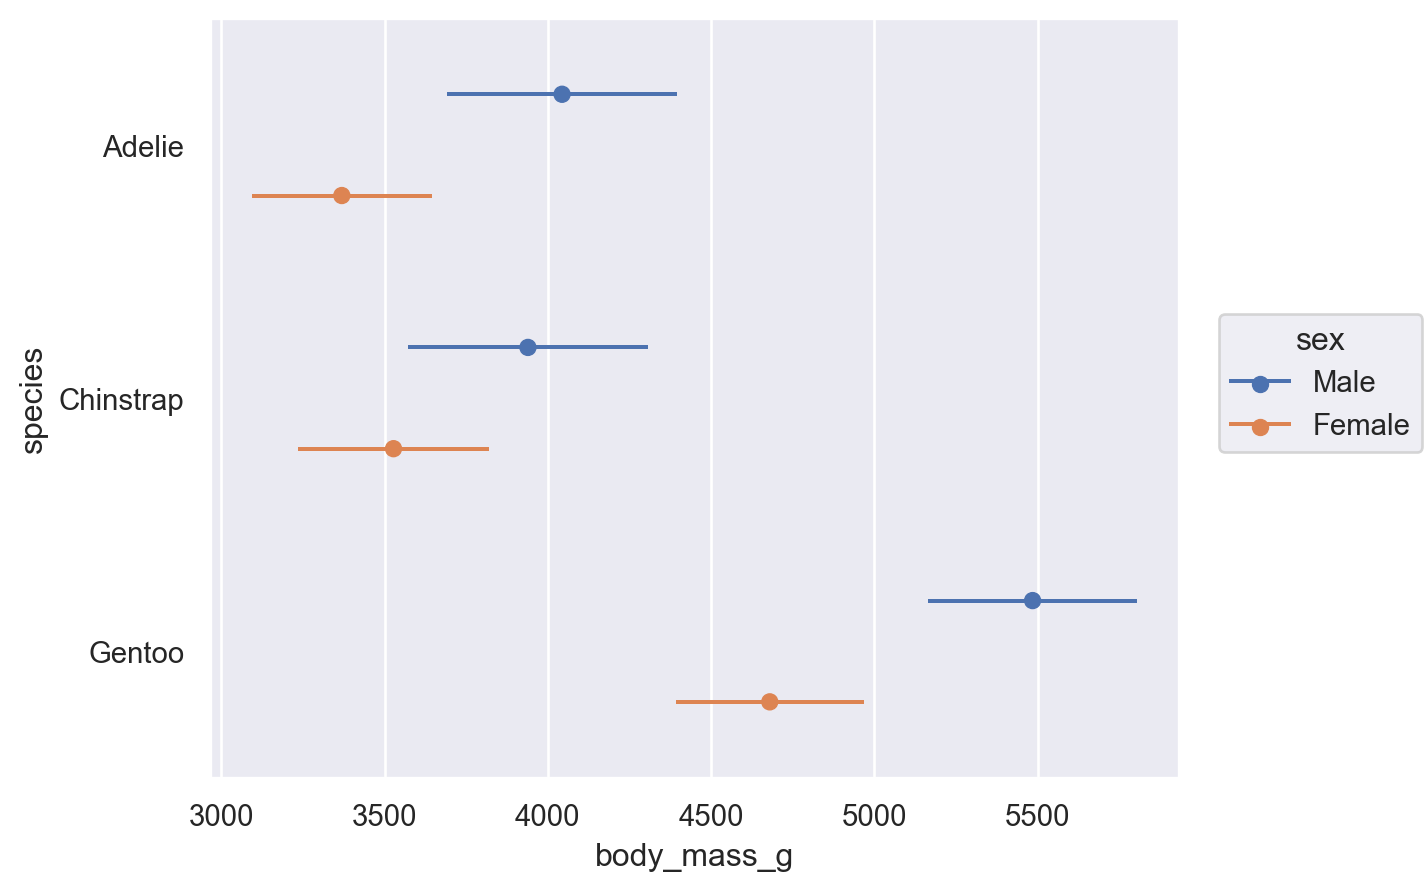

In [22]:
(
so.Plot(penguins, x='body_mass_g', y='species', color='sex')
.add(so.Range(), so.Est(errorbar='sd'), so.Dodge())
.add(so.Dot(), so.Agg(), so.Dodge())
)

### Orienting marks and transforms

- 바 그래프를 합치거나 겹쳐서 그릴때 x y 변수에 대해서는 다르게 다뤄집니다. 
- 각 작업은 방향의 개념을 가지고 있습니다. 
- `Plot`은 자동적으로 변수의 데이터 타입에 따라서 방향성을 결정합니다. 
- 예를 들어 `species`와 `body_mass_g`의 뒤집는다면(xy축 변경) 같은 그래프이지만 수평적 방향성을 가질 것입니다. 

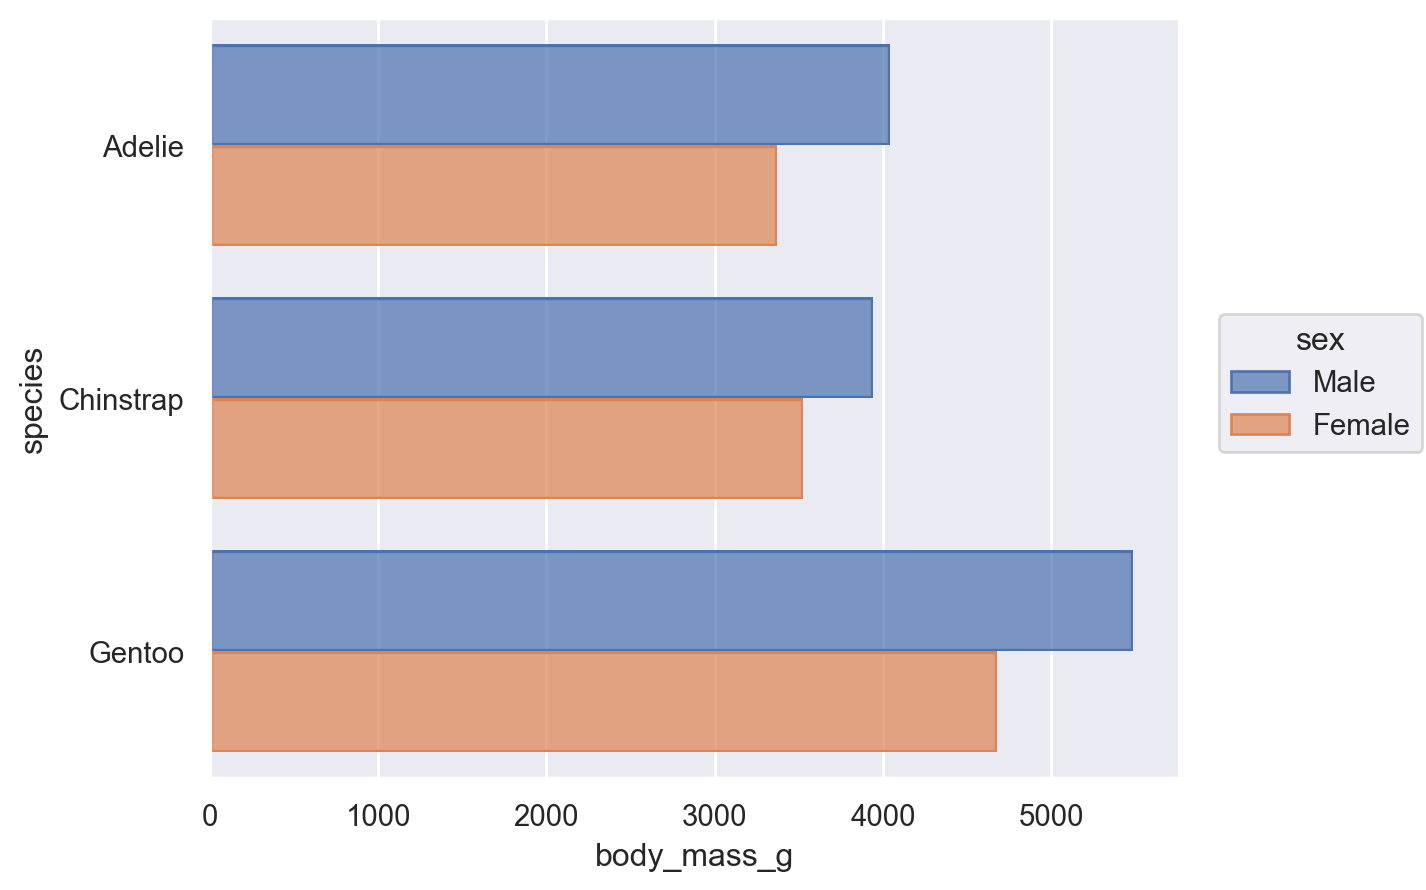

In [26]:
so.Plot(penguins, x='body_mass_g', y='species', color='sex').add(so.Bar(), so.Agg(), so.Dodge())

- xy가 수치형일 때 가끔 정확한 방향성도 모호할 수 있습니다. 
- 이럴 경우에는 `orient` 파라미터를 더해줍니다. 

In [30]:
tips = sns.load_dataset('tips')

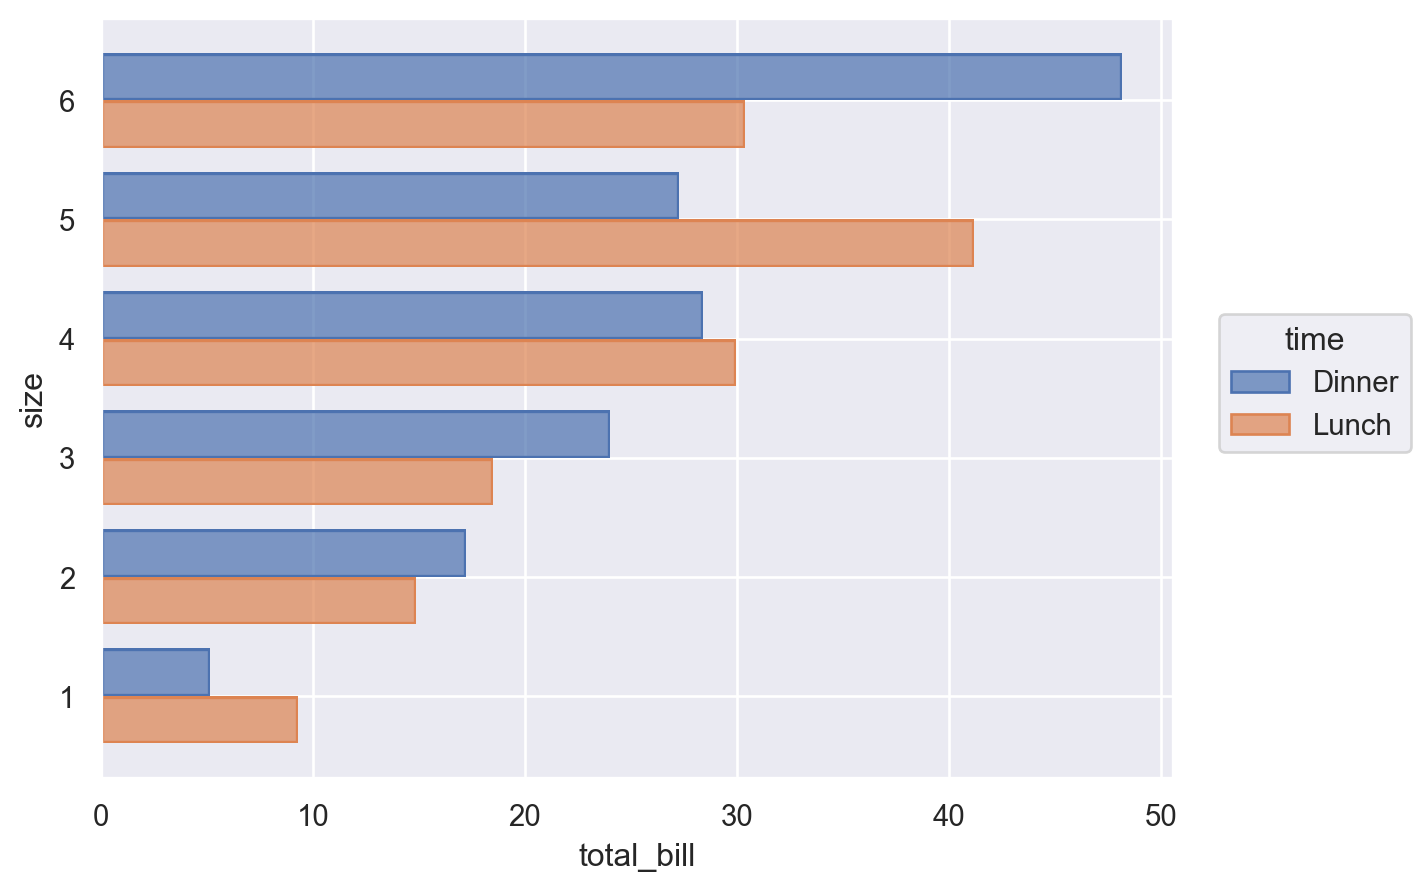

In [31]:
so.Plot(tips, x='total_bill', y='size', color='time').add(so.Bar(), so.Agg(), so.Dodge(), orient='y')

## Building and displaying the plot 

- 지금까지 예시들은 하나의 서브 플롯에 한 가지 종류의 마크를 생성 했습니다. 
- 하지만 `Plot`은 제한이 없습니다

### Adding multiple layers 

- 더 다양한 single-subplot 그래프는 `Plot.add()`를 반복적으로 불러오면서 생성될 수 있습니다. 
- 불러올 때마다 이것은 각 그래프의 레이어라고 불립니다. 
- 예를 들어 지금은 `Dots`를 사용하는 scatterplot을 만들고 회귀선을 넣고 싶다면

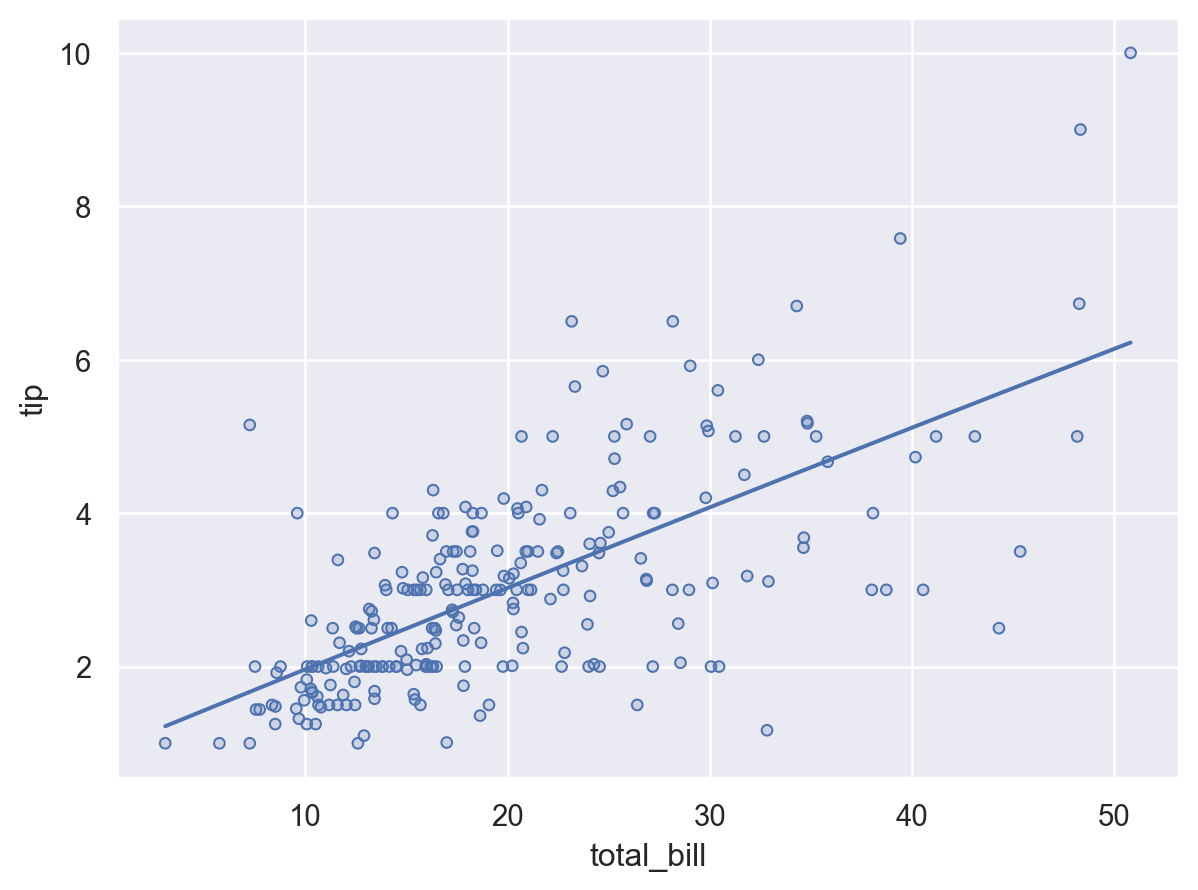

In [36]:
(
so.Plot(tips, x='total_bill', y='tip')
.add(so.Dots())
.add(so.Line(), so.PolyFit())
)

- `Plot`에서 정의된 변수 맵핑은 모든 레이어에 사용됩니다. 

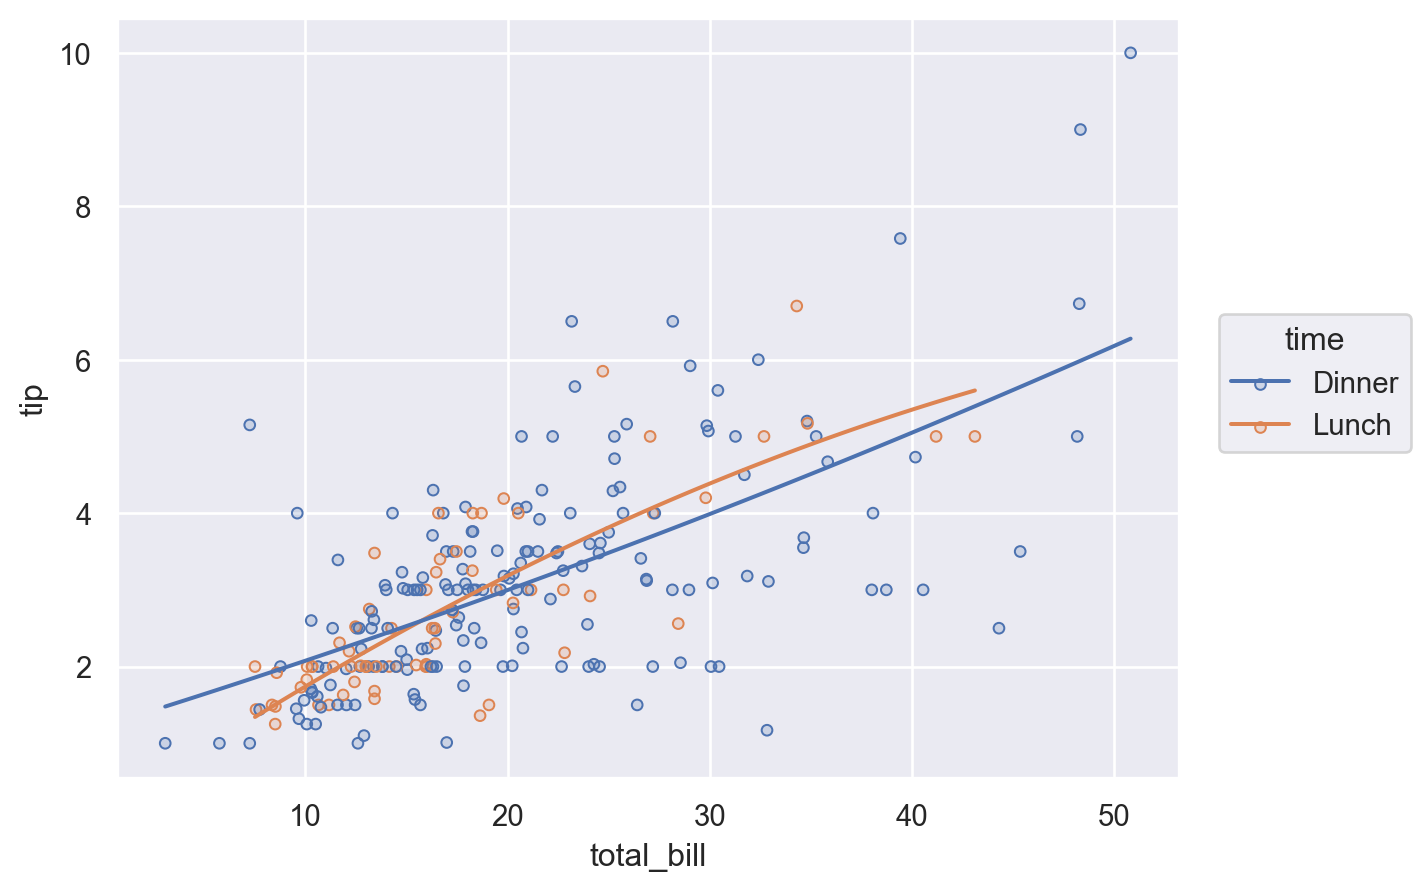

In [37]:
(
so.Plot(tips, x='total_bill', y='tip', color='time')
.add(so.Dots())
.add(so.Line(), so.PolyFit())
)

### Layer-specific mappings

- 특정 레이어에서만 사용될 수 있는 매핑을 정의할 수 있습니다. 
- `Plot.add()`를 불러와 유사한 레이어를 매핑할 수 있습니다. 

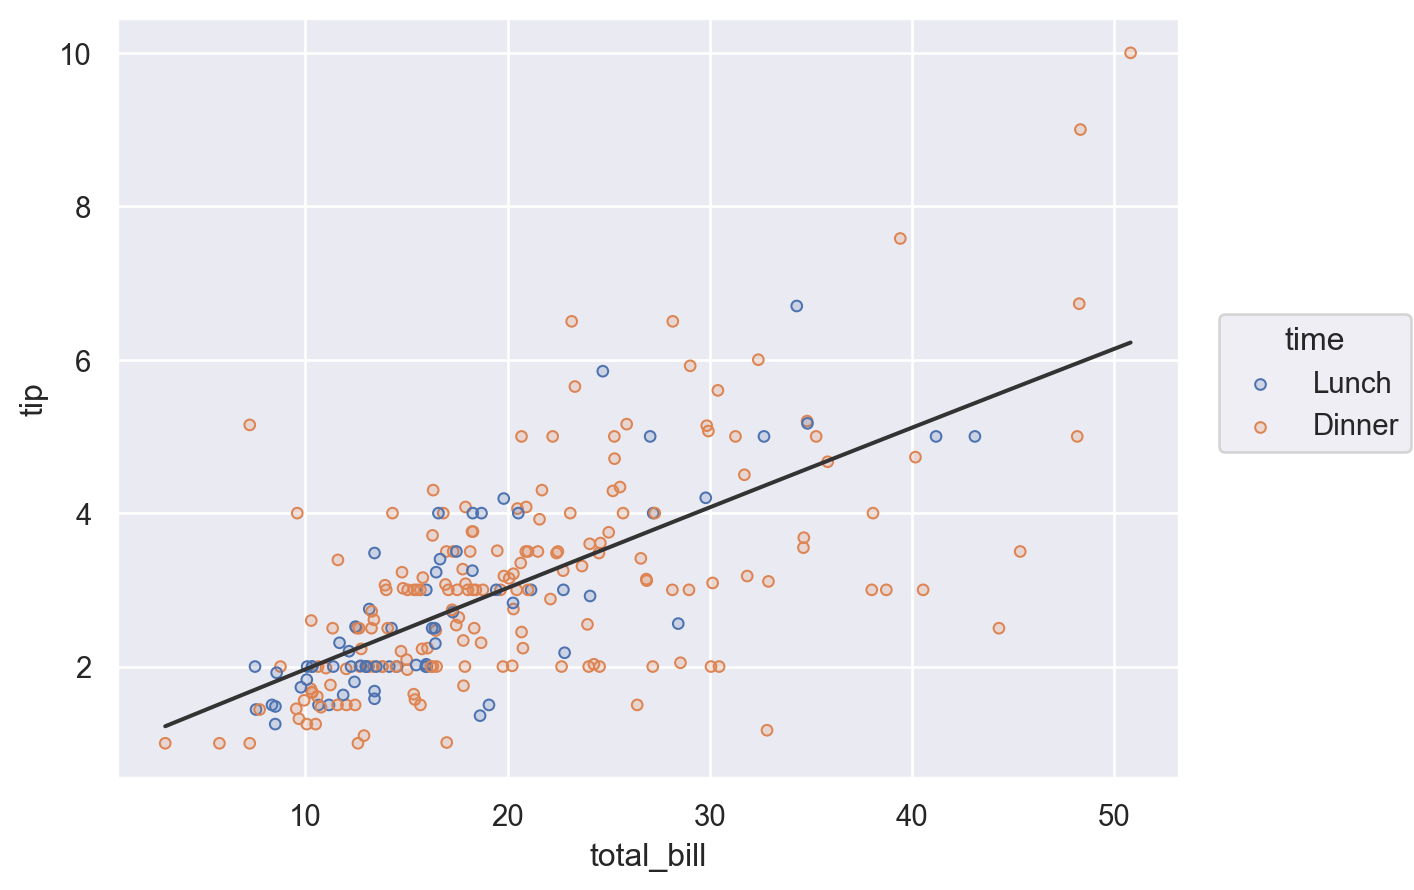

In [39]:
(
so.Plot(tips, x='total_bill', y='tip')
.add(so.Dots(), color='time')
.add(so.Line(color=".2"), so.PolyFit())
)

- 특정 레이어를 NONE으로 지정해 제거할 수도 있습니다. 

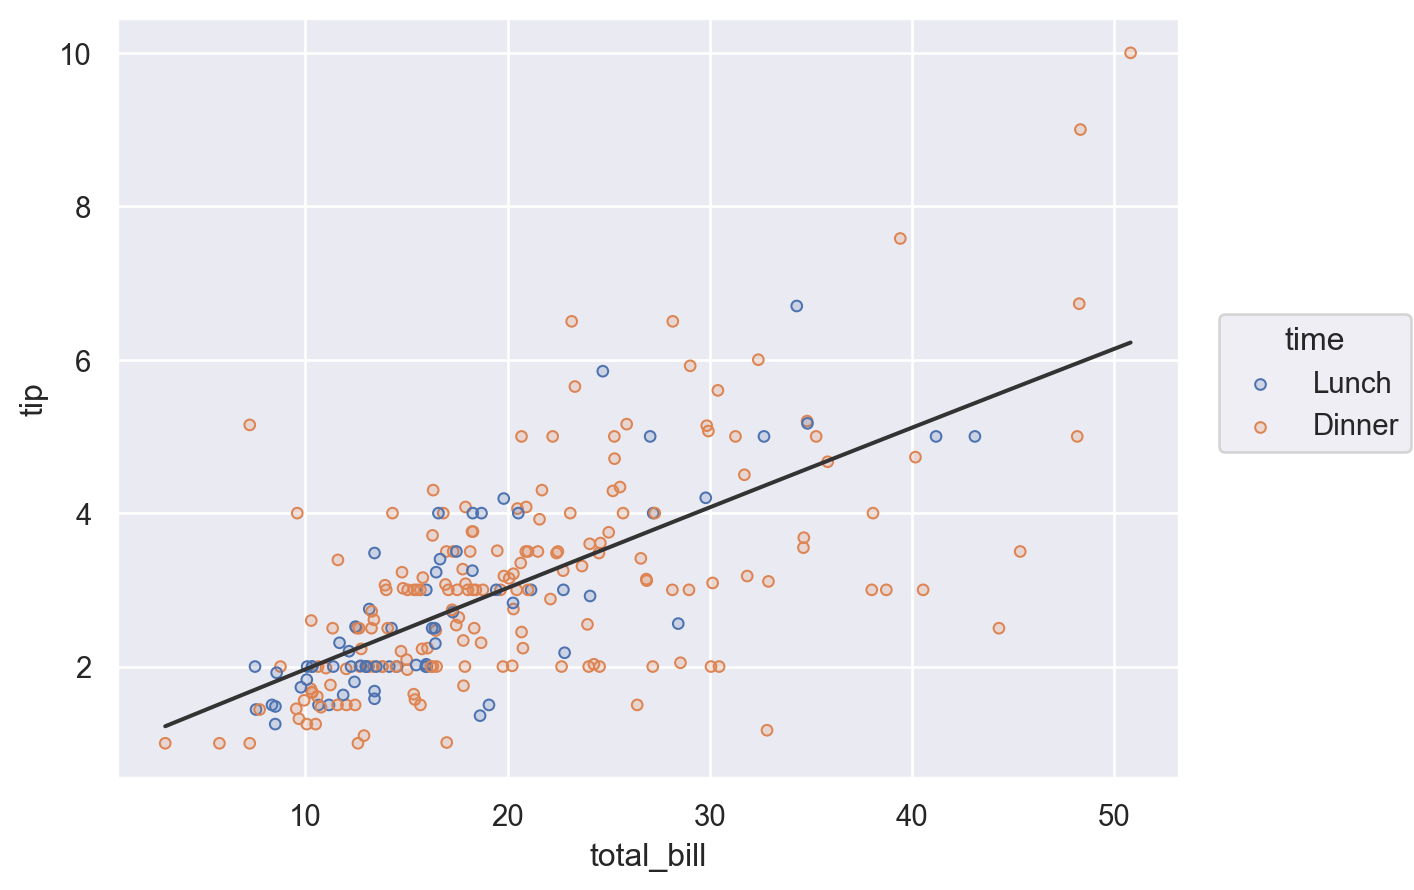

In [40]:
(
so.Plot(tips, x='total_bill', y='tip')
.add(so.Dots(), color='time')
.add(so.Line(color=".2"), so.PolyFit(), color=None)
)

- 상기시키기 위해서 정확히 마크를 하는데에는 정확히 3가지 방법이 있습니다. 
- 1번 모든 레이어에서 변수를 매핑하기 
- 2번 특정 레이어에서 변수 매핑하기 
- 3번 특성을 직접적으로 세팅하기

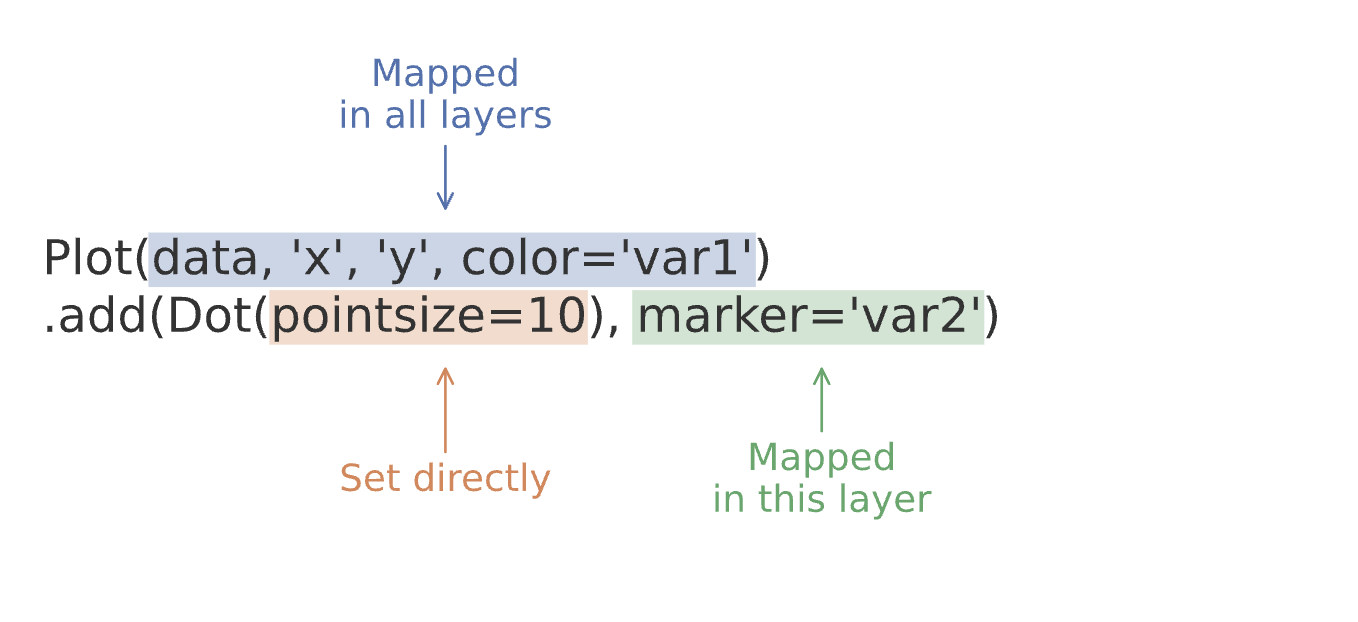

### Faceting and pairing subplots

- `Plot` 인터페이스는 다수의 "facets"를 생성하거나 서브플롯을 생성할 수 있습니다. 
- 이것은 `Plot.facet()` 방법을 사용합니다. 

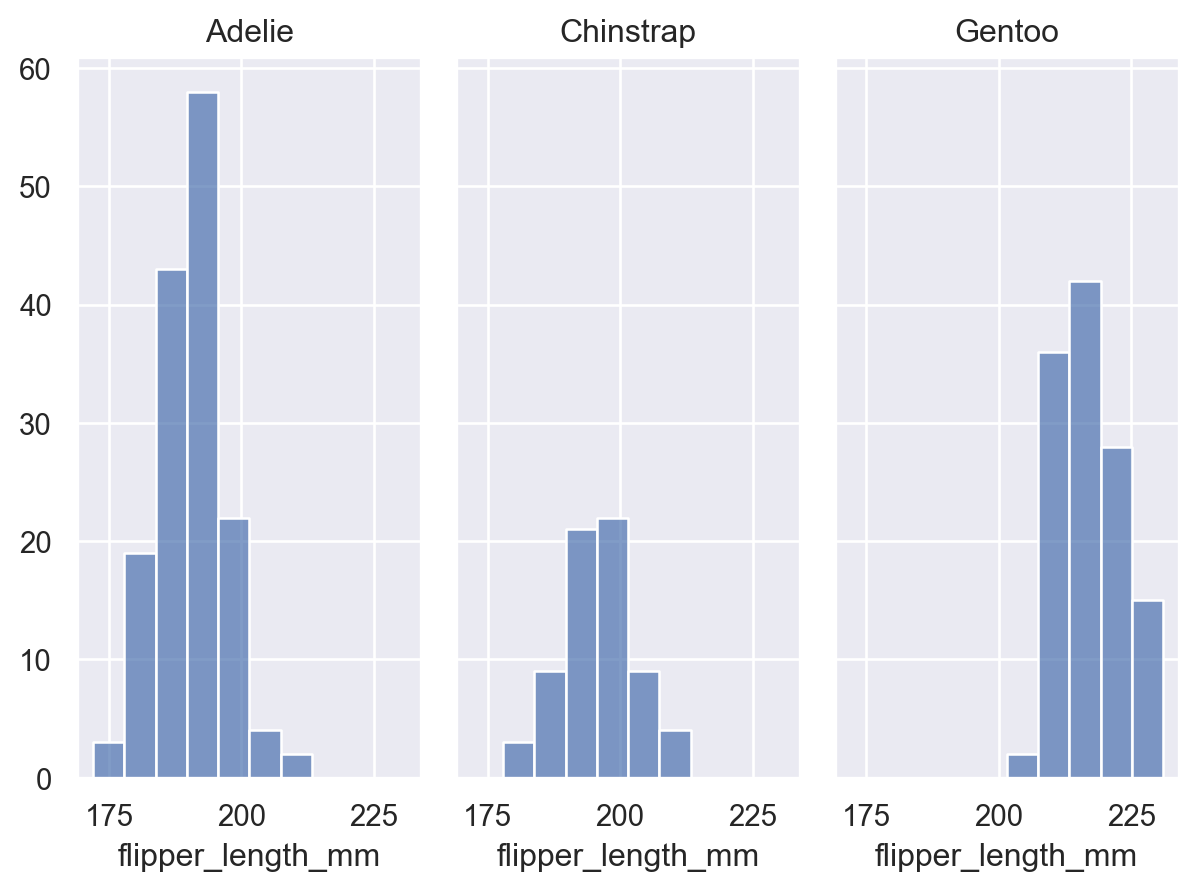

In [42]:
(
    so.Plot(penguins, x='flipper_length_mm')
    .facet('species')
    .add(so.Bars(), so.Hist())
)

- `Plot.facet()`으로는 열 행을 정의해 서브플롯을 만들 수 있습니다. 

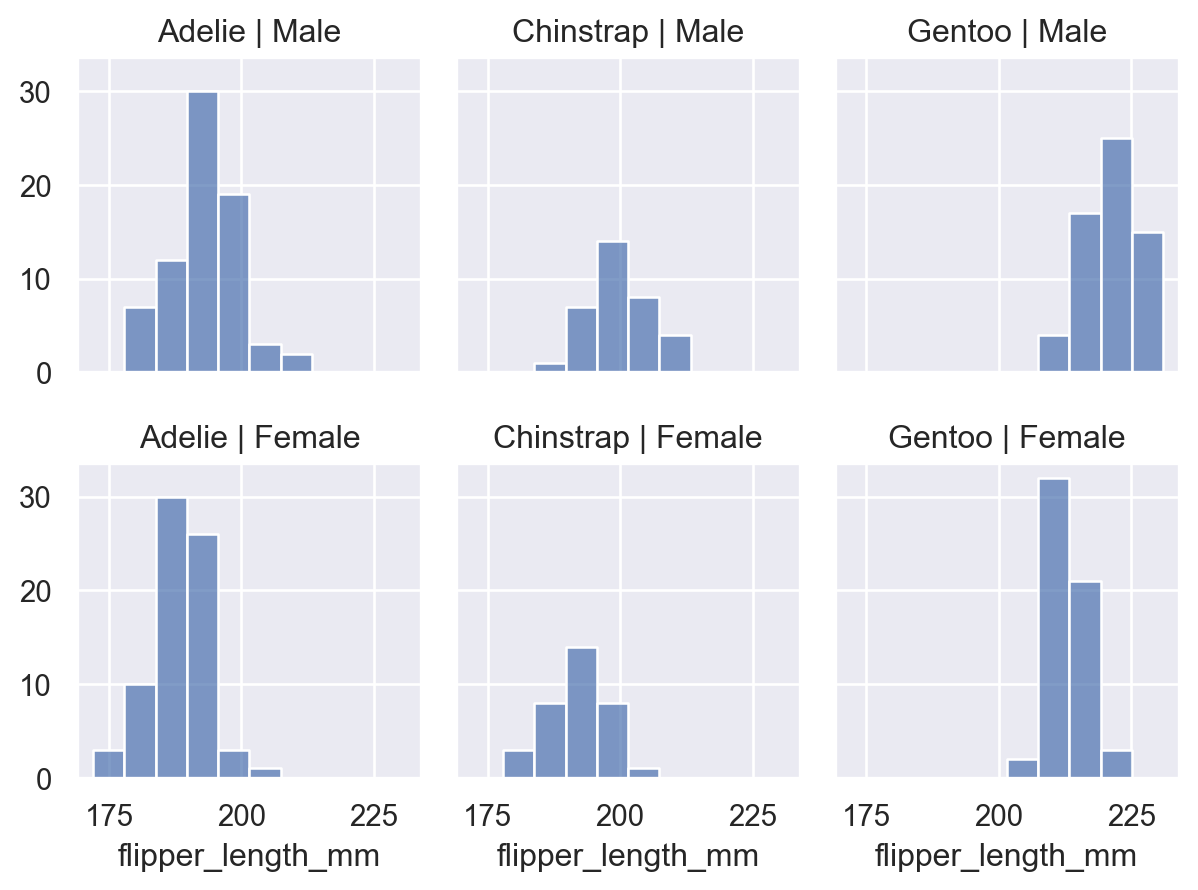

In [43]:
(
    so.Plot(penguins, x='flipper_length_mm')
    .facet(col='species', row='sex')
    .add(so.Bars(), so.Hist())
)

- wrapping을 사용할 수도 있다. 

In [46]:
healthexp = sns.load_dataset('healthexp')

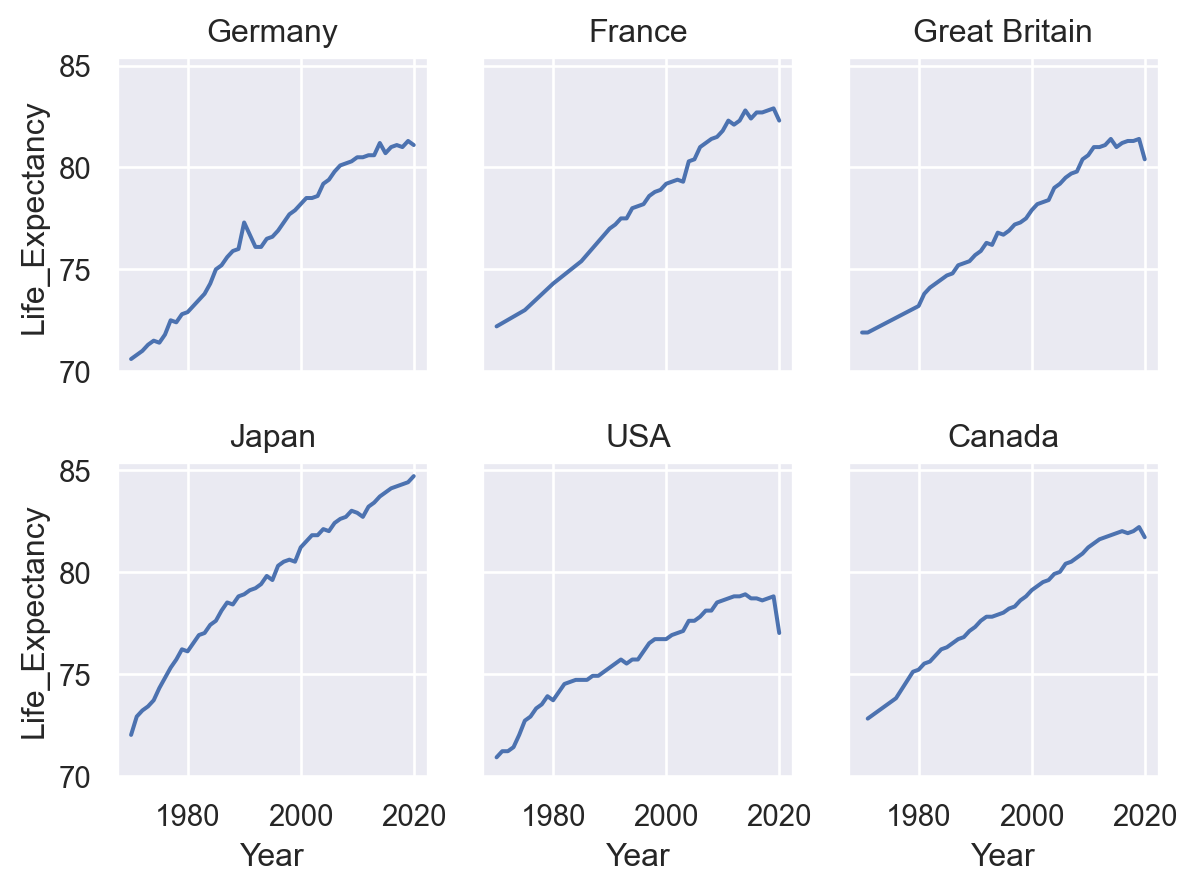

In [47]:
(
    so.Plot(healthexp, x='Year', y='Life_Expectancy')
    .facet(col='Country', wrap=3)
    .add(so.Line())
)

- 특별히 명시하지 않는 이상 모든 레이어가 없어지지 않습니다.

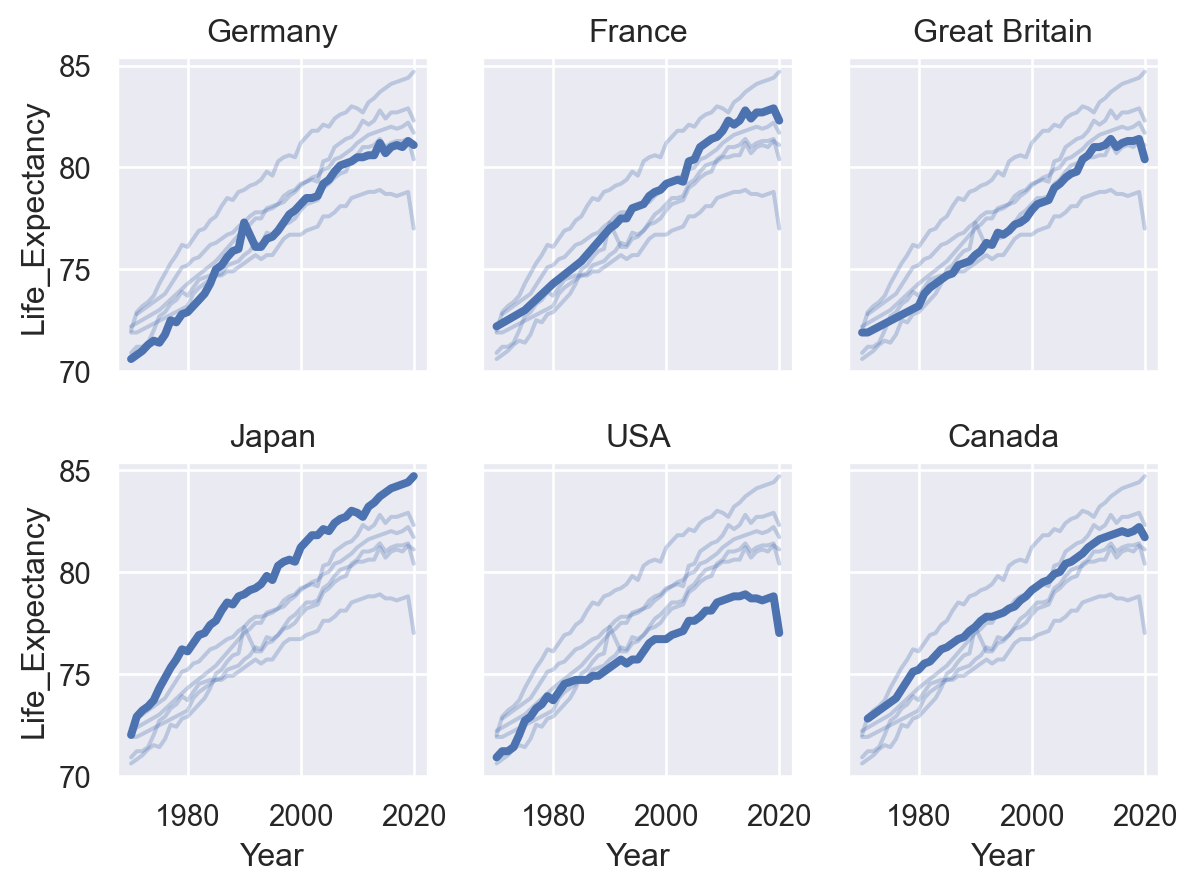

In [48]:
(
    so.Plot(healthexp, x="Year", y='Life_Expectancy')
    .facet("Country", wrap=3)
    .add(so.Line(alpha=.3), group='Country', col=None)
    .add(so.Line(linewidth=3))
)

- 서브플롯을 생성할 수 있는 다른 방법은 `Plot.pair()`이다. `seaborn.PairGrid`와 같이 각 서브플롯의 모든 데이터는 x,y 좌표에 다른 변수를 사용합니다. 

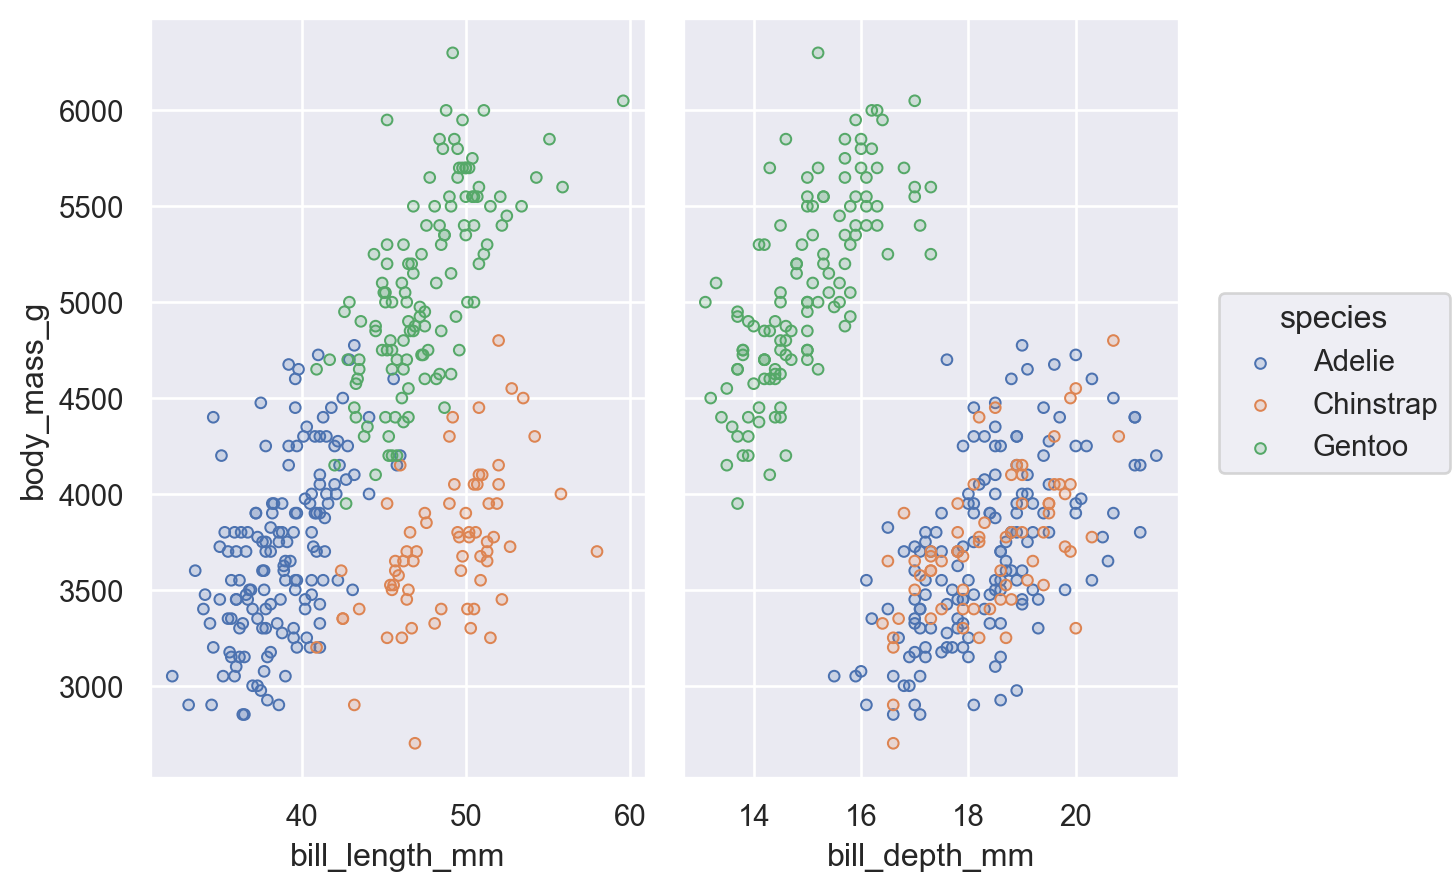

In [49]:
(
    so.Plot(penguins, y="body_mass_g", color="species")
    .pair(x=["bill_length_mm", "bill_depth_mm"])
    .add(so.Dots())
)

- `pair`와 `facet`을 동시에 사용할 수 있습니다.

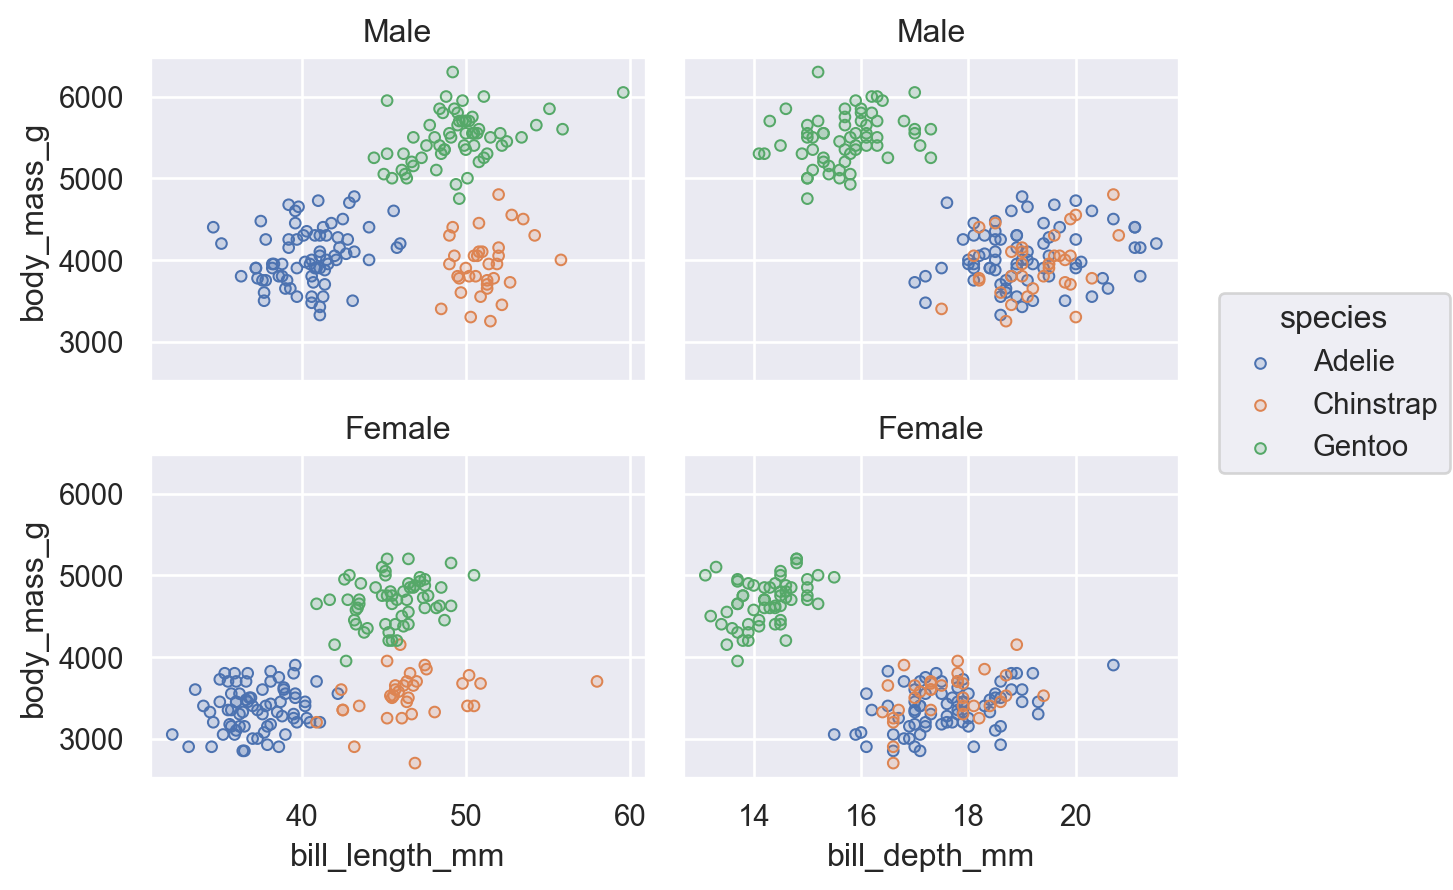

In [50]:
(
    so.Plot(penguins, y='body_mass_g', color='species')
    .pair(x=['bill_length_mm', 'bill_depth_mm'])
    .facet(row='sex')
    .add(so.Dots())
)